In [549]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib_venn import venn2, venn3
from matplotlib.artist import Artist
from scipy import stats
from scipy.stats import norm
import statistics
from simple_colors import *
from itertools import zip_longest
from simple_venn import venn2, venn3, venn4

In [277]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [278]:
df = pd.read_csv("./SGRPmTOR_finalreckoning.csv")

In [279]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [280]:
df.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [281]:
df.shape

(2840, 51)

In [282]:
df.columns

Index(['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf',
       'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment',
       'Strain*Treatment', 'Time_0', 'Time_0.5', 'Time_1', 'Time_1.5',
       'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5',
       'Time_5', 'Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5',
       'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5',
       'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5',
       'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5',
       'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5',
       'Time_20'],
      dtype='object')

In [283]:
df_new = df.dropna()

In [284]:
df_new.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [285]:
df_new.shape

(2526, 51)

In [404]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2799
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experiment        2526 non-null   object 
 1   Line-Treatment    2526 non-null   object 
 2   DT inflection     2526 non-null   float64
 3   StDev_inf         2526 non-null   float64
 4   DT interval       2526 non-null   float64
 5   StDev_int         2526 non-null   float64
 6   Lab strain        2526 non-null   object 
 7   Strain            2526 non-null   object 
 8   Treatment         2526 non-null   object 
 9   Strain*Treatment  2526 non-null   object 
 10  Time_0            2526 non-null   int64  
 11  Time_0.5          2526 non-null   float64
 12  Time_1            2526 non-null   float64
 13  Time_1.5          2526 non-null   float64
 14  Time_2            2526 non-null   float64
 15  Time_2.5          2526 non-null   float64
 16  Time_3            2526 non-null   float64


### Identifying **Experiments**, **Treatments** and **Lab Strains**

In [414]:
experiments = list(df_new.experiment.unique())
line_treatments = list(df_new['Line-Treatment'].unique())
treatments = list(df_new.Treatment.unique())
strains = list(df_new['Strain'].unique())

In [287]:
print("Number of Experiments: ", len(experiments))

Number of Experiments:  57


In [288]:
for i in range(1, 58):
    print(f"Experiment_{i}: ", experiments[i-1])

Experiment_1:  _lowTORIN_KGPUMBL_052817.xls
Experiment_2:  original data.xls SET 4 HIGH RAPA
Experiment_3:  RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls
Experiment_4:  SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls
Experiment_5:  SET1GDC_ARMBL_080217.xls
Experiment_6:  SET2_caffeine_KGPU_080517.xls
Experiment_7:  SET2AZDredo+highTORINMBL_07302017.xls
Experiment_8:  SET3_Low Rapa_REDO_MGK_081117.xls
Experiment_9:  SET4_highTORIN_REDO_NBMBL_080717.xls
Experiment_10:  SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_092617.xls
Experiment_11:  SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_053117.xls
Experiment_12:  SGRP_mTOR_inhibitsSCREEN_SET1_highTORIN_KGPUMBL_052817.xls
Experiment_13:  SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls
Experiment_14:  SGRP_mTOR_inhibitsSCREEN_SET2_HIGH_TORIN_AR_10092017_F.xls
Experiment_15:  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073
Experiment_16:  SGRP_mTOR_inhibitsSCREEN_SET2_highTORIN_JEMBL_081717.xls
Experiment_17:  SGRP_mTOR_inhibit

In [289]:
print("Types of Line-Treatments: ", len(line_treatments))

Types of Line-Treatments:  1050


In [290]:
for i in range(1, 1051):
    print(f"Line_Treatment_{i}: ", line_treatments[i-1])

Line_Treatment_1:  WT-1 uM Torin 1
Line_Treatment_2:  WT-2.5% DMSO
Line_Treatment_3:  NCYC 3264-1 uM Torin 1
Line_Treatment_4:  NCYC 3264-2.5% DMSO
Line_Treatment_5:  NCYC 3265-1 uM Torin 1
Line_Treatment_6:  NCYC 3265-2.5% DMSO
Line_Treatment_7:  NCYC 3266-1 uM Torin 1
Line_Treatment_8:  NCYC 3266-2.5% DMSO
Line_Treatment_9:  NCYC 3284-1 uM Torin 1
Line_Treatment_10:  NCYC 3284-2.5% DMSO
Line_Treatment_11:  NCYC 3290-1 uM Torin 1
Line_Treatment_12:  NCYC 3290-2.5% DMSO
Line_Treatment_13:  NCYC 3311-1 uM Torin 1
Line_Treatment_14:  NCYC 3311-2.5% DMSO
Line_Treatment_15:  NCYC 3312-1 uM Torin 1
Line_Treatment_16:  NCYC 3312-2.5% DMSO
Line_Treatment_17:  NCYC 3313-1 uM Torin 1
Line_Treatment_18:  NCYC 3313-2.5% DMSO
Line_Treatment_19:  NCYC 3319-1 uM Torin 1
Line_Treatment_20:  NCYC 3319-2.5% DMSO
Line_Treatment_21:  NCYC 3445-1 uM Torin 1
Line_Treatment_22:  NCYC 3445-2.5% DMSO
Line_Treatment_23:  NCYC 3447-1 uM Torin 1
Line_Treatment_24:  NCYC 3447-2.5% DMSO
Line_Treatment_25:  NCYC 34

In [291]:
print("Types of Treatments: ", len(treatments))

Types of Treatments:  10


In [292]:
for i in range(1, 11):
    print(f"Treatmemt_{i}: ", treatments[i-1])

Treatmemt_1:  1 uM Torin 1
Treatmemt_2:  2.5% DMSO
Treatmemt_3:  1% DMSO
Treatmemt_4:  20 ng/mL RAPA
Treatmemt_5:  2.5 ng/mL RAPA
Treatmemt_6:  6.67% H2O
Treatmemt_7:  25 uM Torin 1
Treatmemt_8:  100 uM GDC0941
Treatmemt_9:  1 mg/mL Caffeine
Treatmemt_10:  100 uM AZD8055


In [415]:
print("Number of Strains: ", len(strains))

Number of Strains:  88


In [417]:
for i in range(1, 89):
    print(f"Strain_{i}: ", strains[i-1])

Strain_1:  BY4743
Strain_2:  DBVPG 6765
Strain_3:  SK1
Strain_4:  Y55
Strain_5:  YPS128
Strain_6:  DBVPG 6044
Strain_7:  DBVPG 1788
Strain_8:  DBVPG 1373
Strain_9:  DBVPG 1853
Strain_10:  L-1528
Strain_11:  Y12
Strain_12:  DBVPG 1106
Strain_13:  K11
Strain_14:  YS4
Strain_15:  YS9
Strain_16:  322134 S 
Strain_17:  378604 X
Strain_18:  273614 N
Strain_19:  Y6.5
Strain_20:  Q62.5
Strain_21:  Q89.8
Strain_22:  KPN3828
Strain_23:  Y9.6
Strain_24:  Q74.4
Strain_25:  Q69.8
Strain_26:  W7
Strain_27:  Q31.4
Strain_28:  Y8.5
Strain_29:  Z1
Strain_30:  CBS432
Strain_31:  Y8.1
Strain_32:  KPN3829
Strain_33:  UFRJ50791
Strain_34:  IFO1804
Strain_35:  UWOPS91-917.1
Strain_36:  CLIB324
Strain_37:  PW5
Strain_38:  UWOPS83-787.3
Strain_39:  NCYC361
Strain_40:  W303
Strain_41:  Y10
Strain_42:  T21.4
Strain_43:  Q95.3
Strain_44:  A4
Strain_45:  YJM978
Strain_46:  Y9
Strain_47:  UWOPS03-461.4 
Strain_48:  UWOPS05-217.3 
Strain_49:  S288c 
Strain_50:  UWOPS05-227.2 
Strain_51:  DBVPG 6040 
Strain_52:  YII

> ## **Structuring the Dataset**

In [295]:
def struct_data(df, kind, subKind):
    return (df[df[kind] == subKind]).reset_index(drop=True)

def save_file(file, file_name, by_kind):
            return file.to_csv(str(Path().absolute())+f"/Data/{by_kind}/"+ file_name + ".csv", index=False)

def file_check(path):
    if os.path.isfile(path):
        return False
    else:
        return True

In [296]:
kind = ['experiment', 'Line-Treatment', 'Strain', 'Treatment']
by_kind = ['By Experiment', 'By Line-Treatment', 'By Strain', 'By Treatment']
path0 = str(Path().absolute())+f"/Data/{by_kind[0]}/Experiment_1.csv"
path1 = str(Path().absolute())+f"/Data/{by_kind[1]}/Line_Treatment_1.csv"
path2 = str(Path().absolute())+f"/Data/{by_kind[2]}/Strain_1.csv"
path3 = str(Path().absolute())+f"/Data/{by_kind[3]}/Treatment_1.csv"

### By Experiment

In [297]:
if file_check(path0):
    for i in range (1, 58):
        file = struct_data(df_new, kind[0], experiments[i-1])
        file_name = f"Experiment_{i}"
        save_file(file, file_name, by_kind[0])

### By Line-Treatment

In [298]:
if file_check(path1):
    for i in range (1, 1051):
        file = struct_data(df_new, kind[1], line_treatments[i-1])
        file_name = f"Line_Treatment_{i}"
        save_file(file, file_name, by_kind[1])

### By Strain

In [419]:
if file_check(path2):
    for i in range (1, 89):
        file = struct_data(df_new, kind[2], strains[i-1])
        file_name = f"Strain_{i}"
        save_file(file, file_name, by_kind[2])

### By Treatment

In [300]:
if file_check(path3):
    for i in range (1, 11):
        file = struct_data(df_new, kind[3], treatments[i-1])
        file_name = f"Treatment_{i}"
        save_file(file, file_name, by_kind[3])

In [301]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

### Treatment Analysis on the Control Strain : **BY4743**

In [302]:
df_c = pd.read_csv('./Data/By Strain/Strain_1.csv')

In [303]:
df_c.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1 uM Torin 1,72.520115,5.558710,87.728696,1.069446,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031000,0.033000,0.036667,0.044333,0.043667,0.073333,0.096333,0.129333,0.178667,0.222000,0.290667,0.366000,0.458000,0.557333,0.654000,0.754000,0.845333,0.919667,0.955333,0.963000,0.965000,0.972333,0.976000,0.982667,0.989667,0.997667,1.006667,1.016333,1.023667,1.033333,1.043667,1.054333,1.065000,1.076000,1.088667,1.096333,1.106333,1.117667,1.127667,1.136000


In [304]:
print("Out of the total ", df_c.shape[0] ," observations, number of those with : ")
print(treatments[2], " as the treatment : ", df_c[df_c.Treatment == "1% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "1% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[1], " as the treatment : ", df_c[df_c.Treatment == "2.5% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[3], " as the treatment : ", df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")
print(treatments[4], " as the treatment : ", df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")

Out of the total  136  observations, number of those with : 
1% DMSO  as the treatment :  19  ->  13.0 %
2.5% DMSO  as the treatment :  36  ->  26.0 %
20 ng/mL RAPA  as the treatment :  7  ->  5.0 %
2.5 ng/mL RAPA  as the treatment :  12  ->  9.0 %


### Plotting the normal distribution over the treatments

In [305]:
def hist_pdf_plot(DT_treatment, treatment):
    
    mean = np.mean(DT_treatment)
    standard_dev = statistics.stdev(DT_treatment)
    median = np.median(DT_treatment)

    plt.style.use('ggplot')

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6)) #creating plot axes
    (values, bins, _) = ax.hist(DT_treatment, bins=25, density=True, color='grey', alpha=.7, label="Histogram")

    bin_centers = 0.5*(bins[1:] + bins[:-1])

    pdf = stats.norm.pdf(x = bin_centers, loc=mean, scale=standard_dev) #Compute probability density function
    ax.plot(bin_centers, pdf, label="PDF",color='darkblue') #Plot PDF
    ax.axvline(mean, color='darkgreen', linestyle='dashed', linewidth=2, label='mean')
    ax.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='median')

    ax.legend()#Legend entries
    ax.set_title(f'Normal Distribution (PDF) and Histogram representation of {treatment}', fontsize=16)

    plt.tight_layout()
    plt.show()

#### **Plotting for 1% DMSO**

In [306]:
# List of Doubling Time for the 1% DMSO Treatments
DT_DMSO_1 = list((df_c[df_c.Treatment == "1% DMSO"]["DT inflection"]).reset_index(drop=True))

In [307]:
np.mean(DT_DMSO_1)

72.73088400157893

In [308]:
clean_dt = [71.95654991,
 71.80068565,
 72.75335931,
 71.22402774,
 71.55013443,
 73.5992666,
 72.78558069,
 71.63980236,
 73.85627932,
 74.28980159,
 74.23962473,
 73.92783866,
 73.74407088,
 71.72310359]
np.mean(clean_dt)

72.79215181857144

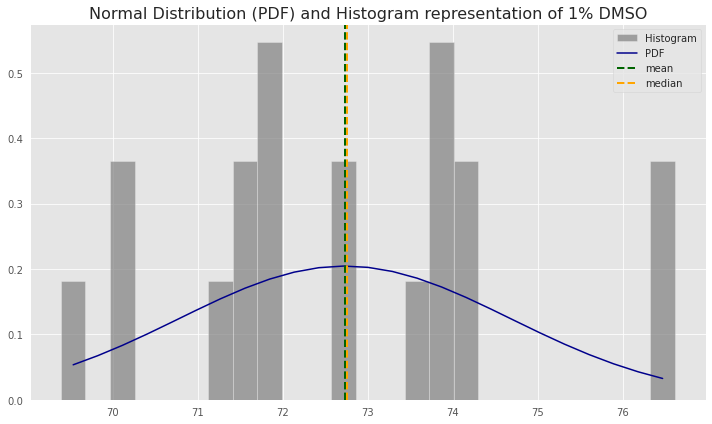

In [309]:
hist_pdf_plot(DT_DMSO_1, '1% DMSO')

#### **Plotting for 2.5% DMSO**

In [310]:
# List of Doubling Time for the 2% DMSO Treatments
DT_DMSO_2 = list((df_c[df_c.Treatment == "2.5% DMSO"]["DT inflection"]).reset_index(drop=True))

In [311]:
np.mean(DT_DMSO_2)

77.49135403555556

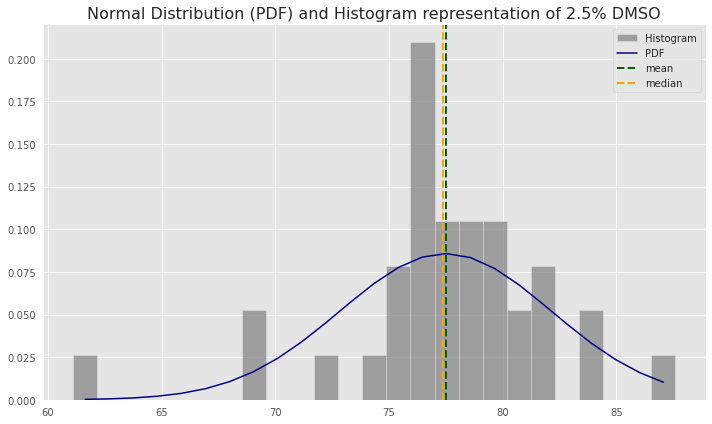

In [312]:
hist_pdf_plot(DT_DMSO_2, '2.5% DMSO')

#### **Plotting for 2.5 ng/mL Rapamycin**

In [313]:
# List of Doubling Time for the 2.5 ng/mL RAPA Treatments
DT_RAPA_1 = list((df_c[df_c.Treatment == "2.5 ng/mL RAPA"]["DT inflection"]).reset_index(drop=True))

In [314]:
DT_RAPA_1

[64.01317505,
 78.08836924,
 77.56189287,
 77.0972575,
 71.94150216,
 71.63159393,
 76.29003941,
 70.46324428,
 71.08819754,
 72.81271758,
 75.45713881,
 43.12589491]

In [315]:
np.mean(DT_RAPA_1)

70.79758527333333

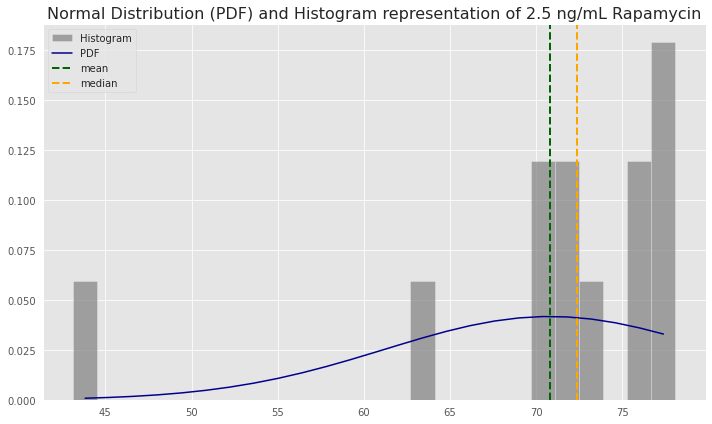

In [316]:
hist_pdf_plot(DT_RAPA_1, '2.5 ng/mL Rapamycin')  

#### **Plotting for 20 ng/mL Rapamycin**

In [317]:
# List of Doubling Time for the 20 ng/mL RAPA Treatments
DT_RAPA_2 = list((df_c[df_c.Treatment == "20 ng/mL RAPA"]["DT inflection"]).reset_index(drop=True))

In [318]:
DT_RAPA_2

[260.0471278,
 317.0612214,
 246.9491257,
 66.28004822,
 103.6058719,
 234.1072087,
 272.346412]

In [319]:
np.mean(DT_RAPA_2)

214.34243081714288

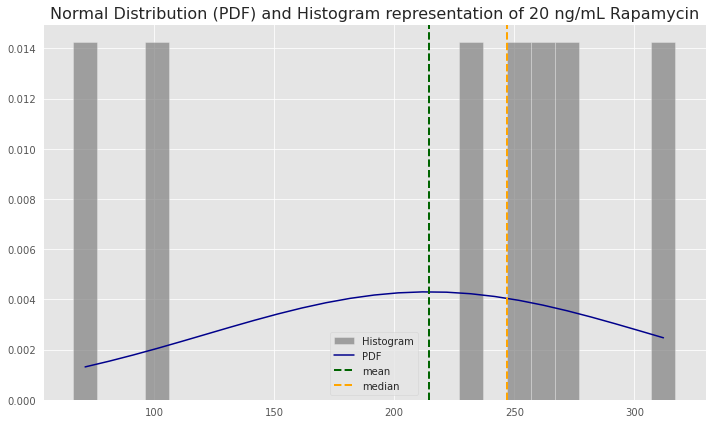

In [320]:
hist_pdf_plot(DT_RAPA_2, '20 ng/mL Rapamycin')

### Identifying Outliers

In [321]:
def Z_score(df, threshold=1):
    
    mean, std = np.mean(df), np.std(df)
    
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    
    new_treatment = [df[i] for i in range(len(df)) if good[i]]
    possible_outliers = [df[i] for i in range(len(df)) if not good[i]]
    
    # print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    
    return z_score, new_treatment, possible_outliers

#### **1% DMSO**

In [322]:
z_score1, new_DT1, possible_outliers1 = Z_score(DT_DMSO_1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT1, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers1)

Rejection 5 points

Doubling Time with possible outliers removed :  [71.95654991, 71.80068565, 72.75335931, 71.22402774, 71.55013443, 73.5992666, 72.78558069, 71.63980236, 73.85627932, 74.28980159, 74.23962473, 73.92783866, 73.74407088, 71.72310359] 

Doubling Time of possible outliers :  [69.39323588, 76.61181509, 70.1853122, 76.35258739, 70.25372001]


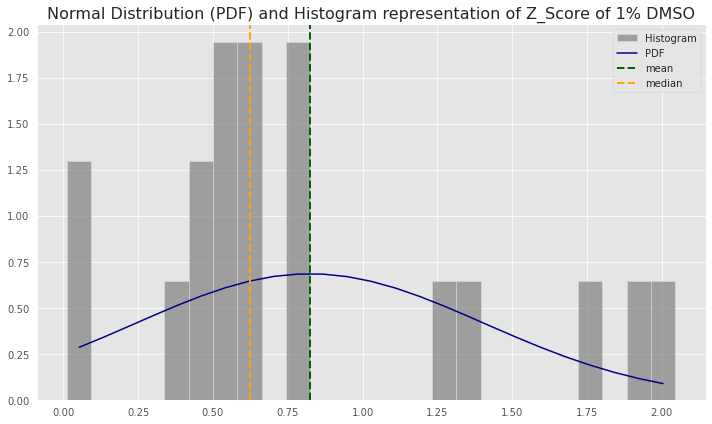

In [323]:
hist_pdf_plot(z_score1, 'Z_Score of 1% DMSO')

#### **2.5% DMSO**

In [324]:
z_score2, new_DT2, possible_outliers2 = Z_score(DT_DMSO_2)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT2, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers2)

Rejection 7 points

Doubling Time with possible outliers removed :  [75.80880433, 75.54400685, 77.37977975, 76.33855158, 79.9449928, 81.4684331, 78.64974328, 81.30649542, 79.70570942, 77.20347584, 76.87473325, 80.34060506, 76.48963591, 76.22787514, 76.3039197, 76.97978683, 81.50895056, 81.05003245, 79.12113992, 78.24745529, 77.3352617, 74.27269104, 77.81167031, 76.87661413, 76.47455606, 75.58075343, 78.21455271, 79.58370045, 80.18053203] 

Doubling Time of possible outliers :  [84.38310148, 68.88651677, 87.60139813, 61.10590795, 72.60216312, 83.71443923, 68.57076026]


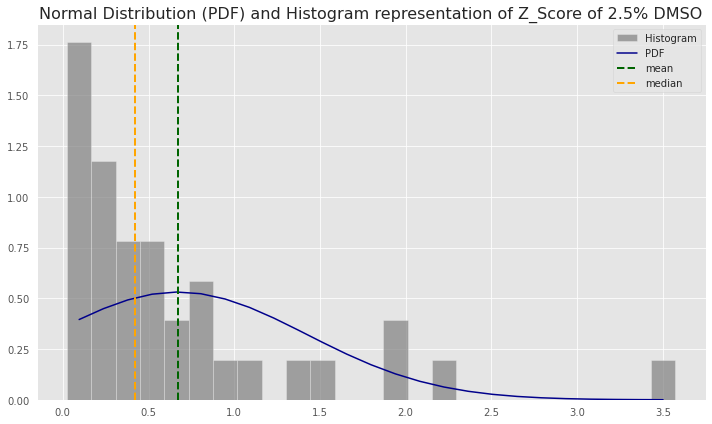

In [325]:
hist_pdf_plot(z_score2, 'Z_Score of 2.5% DMSO')

#### **2.5 ng/mL Rapamycin**

In [326]:
z_score3, new_DT3, possible_outliers3 = Z_score(DT_RAPA_1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT3, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers3)

Rejection 1 points

Doubling Time with possible outliers removed :  [64.01317505, 78.08836924, 77.56189287, 77.0972575, 71.94150216, 71.63159393, 76.29003941, 70.46324428, 71.08819754, 72.81271758, 75.45713881] 

Doubling Time of possible outliers :  [43.12589491]


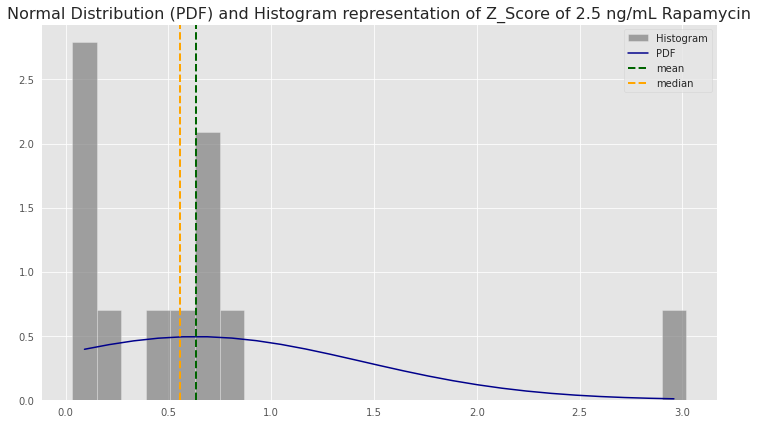

In [327]:
hist_pdf_plot(z_score3, 'Z_Score of 2.5 ng/mL Rapamycin')

#### **20 ng/mL Rapamycin**

In [328]:
z_score4, new_DT4, possible_outliers4 = Z_score(DT_RAPA_2, 1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT4, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers4)

Rejection 3 points

Doubling Time with possible outliers removed :  [260.0471278, 246.9491257, 234.1072087, 272.346412] 

Doubling Time of possible outliers :  [317.0612214, 66.28004822, 103.6058719]


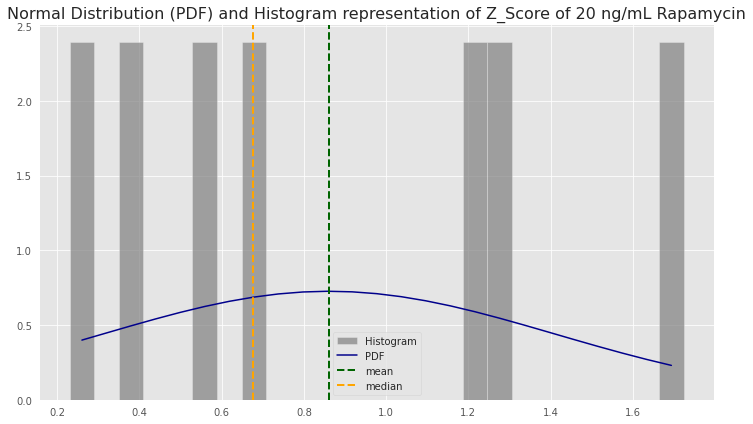

In [329]:
hist_pdf_plot(z_score4, 'Z_Score of 20 ng/mL Rapamycin')

### Check the relevance of the outlier test (Z_Score) perfomed for the different treatments' doubling time inflection data distribution.

Performing **T-test** to ascertain the validity of:
   1. **Null Hypothesis** :- The sample data distribution is not an outlier
   2. **Hypothesis** :- The sample data distribution is an outlier

#### **1% DMSO**

* Variables to test: **1% DMSO possible outliers in BY4743 strain** and (**1% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [330]:
mean1 = np.mean(DT_DMSO_1)
std1 = np.std(DT_DMSO_1)
print(blue("Mean of DT_DMSO_1 : ", 'bold'), mean1, green("\nStandard Deviation of DT_DMSO_1 : ", 'bold'), std1)

Mean of DT_DMSO_1 :  72.73088400157893 
Standard Deviation of DT_DMSO_1 :  1.8982004281432756


In [331]:
stats.ttest_1samp(a = possible_outliers1, # Sample data
                  popmean = mean1)        # Pop mean

Ttest_1sampResult(statistic=-0.10660889366945275, pvalue=0.920232088307664)

In [332]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers1)-1)) # Degrees of freedom

-2.7764451051977996

In [333]:
stats.t.ppf(q = 0.975,                        # Quantile to check
            df = (len(possible_outliers1)-1)) # Degrees of freedom

2.7764451051977987

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution of like our sample data is **92.02%**.

In [334]:
sigma = np.std(possible_outliers1)/len(possible_outliers1) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_DMSO_1)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers1),        # Sample mean
                 scale = sigma)

(71.20705316478417, 73.91161506321582)

Calculating for the **confidence interval** by taking a `95% confidence level` reveals to include the mean of the population sample (DT_DMSO_1), meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be concluded that there are no out of the ordinary doubling time measurements corresponding to 1% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5% DMSO**

* Variables to test: **2.5% DMSO possible outliers in BY4743 strain** and (**2.5% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [335]:
mean2 = np.mean(DT_DMSO_2)
std2 = np.std(DT_DMSO_2)
print(blue("Mean of DT_DMSO_2 : ", 'bold'), mean2, green("\nStandard Deviation of DT_DMSO_2 : ", 'bold'), std2)

Mean of DT_DMSO_2 :  77.49135403555556 
Standard Deviation of DT_DMSO_2 :  4.587462823422111


In [336]:
stats.ttest_1samp(a = possible_outliers2, # Sample data
                  popmean = mean2)        # Pop mean

Ttest_1sampResult(statistic=-0.5887909331315235, pvalue=0.5774792929475171)

In [337]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers2)-1)) # Degrees of freedom

-2.446911848791681

In [338]:
stats.t.ppf(q = 0.975,                        # Quantile to check
            df = (len(possible_outliers2)-1)) # Degrees of freedom

2.4469118487916806

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.74%**.

In [339]:
sigma = np.std(possible_outliers2)/len(possible_outliers2) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_DMSO_2)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers2),        # Sample mean
                 scale = sigma)

(72.58178009664105, 77.95087331478753)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_DMSO_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 2.5% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5 ng/mL Rapamycin**

* Variables to test: **2.5 ng/mL Rapamycin possible outliers in BY4743 strain** and (**2.5 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [340]:
mean3 = np.mean(DT_RAPA_1)
std3 = np.std(DT_RAPA_1)
print(blue("Mean of DT_RAPA_1 : ", 'bold'), mean3, green("\nStandard Deviation of DT_RAPA_1 : ", 'bold'), std3)

Mean of DT_RAPA_1 :  70.79758527333333 
Standard Deviation of DT_RAPA_1 :  9.167367549298636


In [341]:
stats.ttest_1samp(a = possible_outliers3, # Sample data
                  popmean = mean3)        # Pop mean

/home/yeabsira/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yeabsira/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_1sampResult(statistic=nan, pvalue=nan)

We have a `t-statistics` and `pvalue` of `nan` because the sample data distribution presented is just a single value.

> #### Since the second layer of outlier verification is not suitable for application, relying on the first level detection is a logical way to go forward. The possible outlier data point detected is, therefore, treated as an outlier. Accepting the alternative hypothesis leads us to believe that something unusual must have happened in the experiment corresponding to the outlier data point, and opens the possibility for further investigation.

#### **20 ng/mL Rapamycin**

* Variables to test: **20 ng/mL Rapamycin possible outliers in BY4743 strain** and (**20 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [342]:
mean4 = np.mean(DT_RAPA_2)
std4 = np.std(DT_RAPA_2)
print(blue("Mean of DT_RAPA_2 : ", 'bold'), mean4, green("\nStandard Deviation of DT_RAPA_2 : ", 'bold'), std4)

Mean of DT_RAPA_2 :  214.34243081714288 
Standard Deviation of DT_RAPA_2 :  85.8931468372651


In [343]:
stats.ttest_1samp(a = possible_outliers4, # Sample data
                  popmean = mean4)        # Pop mean

Ttest_1sampResult(statistic=-0.6659895082503774, pvalue=0.5739530297974219)

In [344]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers4)-1)) # Degrees of freedom

-4.3026527299112765

In [345]:
stats.t.ppf(q=0.975,                        # Quantile to check
            df=(len(possible_outliers4)-1)) # Degrees of freedom

4.302652729911275

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.39%**.

In [346]:
sigma = np.std(possible_outliers4)/len(possible_outliers4) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_RAPA_2)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers4),        # Sample mean
                 scale = sigma)

(72.20610567496318, 252.4253220050369)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_RAPA_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 20 ng/mL Rapamycin treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **NB :** It should be noted that by varying the value for the confidence level, a statistical significance could arise indicating the possible outliers are indeed one. This results in the acceptance of the alternative hypothesis, and inturn lead us to believe there is something interesting happening with the corresponding experiments performed. It should also be noted that the minimal data points presented for the total population and sample data distribution for the BY4743 strain is a hinderance for outlier identification.

### Comparing and plotting the growth rate over time for BY4743 strain

In [347]:
t_path = "./Data/By Treatment/Treatment_"

In [348]:
def st_data(treat_num, path=t_path, strain="BY4743", feature_drop=True):
    """
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatment and strain group.
    """
    
    drop_features = ['experiment', 'Line-Treatment', 'Lab strain', 'Strain', 'Treatment', 'Strain*Treatment'] 
    
    treatment = pd.read_csv(path + str(treat_num)+".csv")
    treatment_strain = treatment[treatment['Strain'] == strain].reset_index(drop=True)
    
    if feature_drop == True:
        treatment_strain = treatment_strain.drop(drop_features, axis=1)
    
    return treatment_strain

In [413]:
st_data(treat_num=1, path=t_path, strain=strains[4], feature_drop=True)

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20


In [349]:
def st_avg_data(path=t_path, strain="BY4743", feature_drop=True):
    
    data = list()
    index = list()
    
    for i in range(1,11):
        ts = (st_data(treat_num=i, path=path, strain=strain, feature_drop=feature_drop)).mean()
        data.append(ts)
        index.append(treatments[i-1])
        
    avg_data = pd.DataFrame(data, index=index)
    
    return avg_data

In [350]:
help(st_data)

Help on function st_data in module __main__:

st_data(treat_num, path='./Data/By Treatment/Treatment_', strain='BY4743', feature_drop=True)
    > Treatment number, indicated by the parameter 'treat_num', can be identified by the following pattern:
        <> 1 uM Torin 1     _______    1
        <> 2.5% DMSO        _______    2
        <> 1% DMSO          _______    3
        <> 20 ng/mL RAPA    _______    4
        <> 2.5 ng/mL RAPA   _______    5
        <> 6.67% H2O        _______    6
        <> 25 uM Torin 1    _______    7
        <> 100 uM GDC0941   _______    8
        <> 1 mg/mL Caffeine _______    9
        <> 100 uM AZD8055   _______    10
    
    > The 'path' parameter is by default set equal to t_path.
    
    > The 'strain' parameter is set equal to "BY4743" by default.
    
    > The 'feature_drop' parameters gives a boolean option to clean the desired data of the extraneous features. It is set to True by default.
    
    > Returns a DataFrame for the specified treatm

In [351]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [352]:
RAPA1_control = st_data(treat_num=5, path=t_path, strain="BY4743")
RAPA2_control = st_data(treat_num=4, path=t_path, strain="BY4743")

In [353]:
DMSO1_control = st_data(treat_num=3, path=t_path, strain="BY4743")
DMSO2_control = st_data(treat_num=2, path=t_path, strain="BY4743")

In [354]:
Torin1_control = st_data(treat_num=1, path=t_path, strain="BY4743")
Torin2_control = st_data(treat_num=7, path=t_path, strain="BY4743")

In [355]:
GDC0941_control = st_data(treat_num=8, path=t_path, strain="BY4743")
Caffeine_control = st_data(treat_num=9, path=t_path, strain="BY4743")
AZD8055_control = st_data(treat_num=10, path=t_path, strain="BY4743")
H2O_control = st_data(treat_num=6, path=t_path, strain="BY4743")

In [356]:
RAPA1_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,64.013175,2.594965,83.988136,3.220114,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
1,78.088369,0.383663,80.376903,2.150477,0,0.036667,0.040667,0.043333,0.051000,0.065000,0.083000,0.106000,0.139000,0.182000,0.234333,0.303667,0.393333,0.494333,0.615000,0.733000,0.853000,0.968333,1.058333,1.107667,1.108667,1.114000,1.123333,1.130667,1.141667,1.152000,1.164000,1.179000,1.191667,1.209667,1.223333,1.245333,1.263333,1.284667,1.305333,1.324667,1.341667,1.360333,1.379333,1.397333,1.415333
2,77.561893,3.355332,89.770834,3.545155,0,0.043333,0.046000,0.049333,0.057000,0.069000,0.085667,0.111333,0.139333,0.181333,0.234000,0.293667,0.368000,0.449000,0.536667,0.631667,0.731333,0.829667,0.921667,1.005333,1.067000,1.118000,1.143667,1.156333,1.169333,1.181333,1.199333,1.216000,1.236667,1.257667,1.282333,1.306000,1.330333,1.351333,1.375667,1.397667,1.416667,1.435000,1.452000,1.468667,1.483667
3,77.097257,0.437107,81.161361,0.575085,0,0.054667,0.058000,0.063667,0.073667,0.088667,0.107667,0.134667,0.173333,0.220667,0.289000,0.375000,0.483000,0.611333,0.753000,0.891333,1.014333,1.114333,1.184667,1.215667,1.227000,1.233333,1.238333,1.244333,1.249000,1.255333,1.260000,1.266333,1.275667,1.286333,1.299667,1.313333,1.331333,1.348667,1.370000,1.389333,1.411000,1.433333,1.454000,1.473333,1.494333
4,71.941502,1.365780,72.825664,1.189565,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
5,71.631594,1.187630,73.752719,0.695045,0,0.038667,0.043667,0.051000,0.061000,0.076667,0.097000,0.125333,0.164000,0.216667,0.289667,0.380000,0.489333,0.617000,0.759000,0.901333,1.024000,1.125000,1.181333,1.194333,1.205000,1.215333,1.225000,1.234000,1.243667,1.253000,1.261333,1.271000,1.283667,1.299000,1.314333,1.332667,1.350667,1.370333,1.391000,1.412000,1.433667,1.455333,1.475667,1.495000,1.514000
6,76.290039,3.106836,77.893450,2.691584,0,0.047667,0.054667,0.063667,0.080667,0.100667,0.131000,0.169333,0.222000,0.289000,0.376000,0.482333,0.605333,0.744667,0.881667,1.006000,1.107333,1.180333,1.225667,1.243667,1.251667,1.261333,1.269667,1.281000,1.286667,1.295000,1.306333,1.316000,1.327000,1.338667,1.350667,1.363000,1.376333,1.393000,1.410333,1.428667,1.448333,1.473667,1.497333,1.519667,1.543000
7,70.463244,1.109997,73.498258,0.888125,0,0.033000,0.037000,0.041000,0.049333,0.063333,0.084000,0.110667,0.150000,0.201000,0.267667,0.351333,0.454333,0.575333,0.705000,0.829667,0.950333,1.047667,1.100333,1.106000,1.111667,1.121333,1.129000,1.139667,1.150333,1.160667,1.171667,1.183333,1.197333,1.212667,1.227667,1.244667,1.261000,1.280000,1.298000,1.316667,1.333667,1.348000,1.364333,1.381333,1.396667
8,71.088198,1.631667,74.545128,0.424365,0,0.029333,0.033000,0.038667,0.049000,0.064000,0.084333,0.111667,0.149000,0.200000,0.263333,0.346333,0.447667,0.568000,0.694000,0.819000,0.936667,1.036000,1.092333,1.104333,1.108667,1.115667,1.124000,1.135667,1.145333,1.158000,1.168333,1.182000,1.197667,1.212333,1.230333,1.249000,1.266000,1.285667,1.304000,1.319333,1.337667,1.353333,1.370000,1.387

In [357]:
RAPA2_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,260.047128,11.569153,470.258578,21.283503,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
1,317.061221,11.396644,540.860914,32.967754,0,0.034000,0.038000,0.042000,0.044000,0.046333,0.048667,0.052667,0.056667,0.060000,0.063667,0.067667,0.071333,0.076333,0.080667,0.084333,0.090000,0.095333,0.100000,0.106333,0.111333,0.117333,0.124000,0.130667,0.137667,0.144333,0.152333,0.160000,0.167667,0.175000,0.184667,0.191333,0.200000,0.210000,0.217000,0.226000,0.235000,0.246667,0.256000,0.265667,0.275667
2,246.949126,23.923174,425.958663,61.086824,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333
3,66.280048,1.170398,67.474769,1.769920,0,0.038333,0.040000,0.043000,0.045000,0.048333,0.052333,0.056000,0.061333,0.067667,0.077000,0.089000,0.108333,0.136000,0.179333,0.243000,0.332333,0.453667,0.598000,0.747000,0.872667,0.979333,1.062333,1.125333,1.170333,1.204667,1.232333,1.253333,1.270667,1.285000,1.295000,1.302333,1.307333,1.309667,1.310000,1.308667,1.310667,1.304000,1.301000,1.292000,1.284000
4,103.605872,7.568691,660.406587,126.750274,0,0.028333,0.033667,0.041667,0.049333,0.056333,0.066667,0.072667,0.076667,0.083667,0.091333,0.142333,0.107667,0.117667,0.127000,0.141667,0.148333,0.155667,0.176333,0.179000,0.192000,0.206667,0.213333,0.227333,0.237667,0.249333,0.304333,0.279667,0.285333,0.298333,0.311667,0.321000,0.334667,0.345333,0.358667,0.366333,0.383333,0.393333,0.405333,0.416333,0.430667
5,234.107209,13.572955,435.355752,37.430549,0,0.032333,0.037000,0.042667,0.048667,0.053667,0.059333,0.065333,0.072333,0.079000,0.086667,0.093667,0.101333,0.110000,0.117000,0.127667,0.136667,0.146667,0.157000,0.168000,0.180667,0.193000,0.206333,0.219000,0.234000,0.247000,0.261000,0.276333,0.292333,0.308000,0.323333,0.339333,0.355667,0.371000,0.386667,0.404333,0.421667,0.438667,0.454667,0.471667,0.490333
6,272.346412,22.955615,534.470140,2.515240,0,0.040333,0.045333,0.050000,0.054000,0.058000,0.062667,0.067000,0.071000,0.076333,0.081667,0.086333,0.092667,0.098000,0.104000,0.111000,0.116667,0.125000,0.130667,0.139000,0.146667,0.150667,0.162667,0.171000,0.179333,0.188333,0.197000,0.207000,0.216333,0.224000,0.237000,0.245000,0.254000,0.264667,0.275667,0.289333,0.300667,0.312000,0.323000,0.335000,0.348667


In [358]:
DMSO1_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,71.956550,1.083065,74.768422,2.232198,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
1,69.393236,2.539779,77.138745,3.599276,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
2,71.800686,3.114633,82.620660,2.702329,0,0.038000,0.044333,0.046667,0.056000,0.073000,0.093333,0.117333,0.158000,0.207333,0.261333,0.342667,0.441667,0.553000,0.676667,0.795333,0.907000,1.009000,1.066000,1.078667,1.078667,1.086333,1.094667,1.098333,1.109333,1.117667,1.128333,1.145667,1.151667,1.161333,1.171000,1.185000,1.193667,1.209000,1.221667,1.234333,1.241667,1.256667,1.271333,1.285000,1.297667
3,72.753359,4.556768,76.990288,0.606452,0,0.047667,0.050000,0.054000,0.063667,0.077000,0.098333,0.126000,0.163667,0.217000,0.286000,0.369000,0.471333,0.585333,0.711000,0.834667,0.948333,1.032333,1.075333,1.082667,1.090333,1.092667,1.101667,1.109333,1.118333,1.129333,1.138000,1.151000,1.159000,1.170333,1.183333,1.194000,1.205667,1.215667,1.228000,1.237000,1.250667,1.259333,1.270333,1.281000,1.293333
4,71.224028,2.020860,73.509534,0.462129,0,0.039000,0.045000,0.055333,0.068667,0.090000,0.117000,0.155333,0.207333,0.274333,0.363333,0.467333,0.589667,0.710000,0.834667,0.948333,1.027667,1.059000,1.059333,1.065333,1.072000,1.078000,1.087000,1.098000,1.106667,1.116000,1.125667,1.140000,1.149333,1.160000,1.171333,1.182667,1.193667,1.206667,1.217667,1.230333,1.241333,1.254333,1.267667,1.280000,1.292000
5,76.611815,1.777645,78.834509,2.397538,0,0.055333,0.060000,0.068000,0.080667,0.096667,0.120667,0.153000,0.197333,0.255667,0.335333,0.436667,0.557000,0.695333,0.837333,0.962333,1.067333,1.132000,1.168000,1.176333,1.182000,1.189000,1.192667,1.200000,1.202333,1.211333,1.214667,1.223333,1.230333,1.239667,1.251333,1.262667,1.276667,1.289000,1.301333,1.314667,1.328000,1.342333,1.354333,1.371667,1.388000
6,71.550134,0.362163,73.668221,1.045512,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
7,70.185312,2.801380,72.519742,1.574369,0,0.036333,0.040667,0.047000,0.056000,0.070333,0.092667,0.122333,0.162333,0.216667,0.287667,0.378000,0.484667,0.607667,0.733667,0.857000,0.967333,1.045000,1.093667,1.111000,1.116000,1.122667,1.131333,1.139333,1.150000,1.159333,1.168667,1.180000,1.190000,1.200333,1.212667,1.225667,1.236667,1.249000,1.262000,1.274667,1.285667,1.299667,1.312333,1.325333,1.337000
8,73.599267,1.765772,75.464563,0.458218,0,0.038667,0.042667,0.050000,0.060667,0.077000,0.098667,0.129667,0.170667,0.225667,0.297333,0.389000,0.499000,0.626667,0.765000,0.899667,1.019000,1.103000,1.147333,1.153333,1.162667,1.172000,1.182667,1.190000,1.199333,1.206667,1.215667,1.225667,1.236000,1.248000,1.261667,1.275000,1.290333,1.305000,1.321333,1.337000,1.352667,1.368333,1.385667,1.398

In [359]:
DMSO2_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,84.383101,4.532748,90.556861,2.269390,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
1,75.808804,2.918282,85.705342,2.026005,0,0.035667,0.038333,0.043667,0.050333,0.046667,0.074333,0.097000,0.126000,0.167000,0.217667,0.275000,0.346667,0.429667,0.525333,0.617667,0.717333,0.811000,0.889667,0.933000,0.943333,0.945333,0.955333,0.960000,0.966667,0.975667,0.985667,0.992000,1.002667,1.010667,1.023667,1.034000,1.042667,1.051667,1.064667,1.071333,1.083333,1.093000,1.102667,1.111333,1.122667
2,75.544007,3.017342,80.790763,1.830439,0,0.036000,0.041333,0.049667,0.059333,0.075333,0.097333,0.126667,0.163667,0.215333,0.277333,0.358667,0.454000,0.560333,0.678000,0.793667,0.905333,0.999333,1.069333,1.092000,1.096000,1.101333,1.115667,1.118000,1.127667,1.141000,1.148333,1.160000,1.170333,1.183000,1.195333,1.204000,1.214333,1.226333,1.237333,1.249667,1.260333,1.272000,1.281000,1.291333,1.303000
3,68.886517,0.623195,70.409317,0.866966,0,0.039333,0.046000,0.057000,0.070000,0.095333,0.133667,0.183000,0.244667,0.328667,0.433000,0.554333,0.690333,0.839000,0.996000,1.092667,1.112667,1.134000,1.151667,1.176667,1.207667,1.236333,1.266333,1.300000,1.332000,1.366333,1.393667,1.423667,1.450000,1.475667,1.503333,1.521000,1.544667,1.561000,1.576000,1.596000,1.609667,1.626000,1.641667,1.650000,1.660667
4,77.379780,1.141481,85.542929,1.364424,0,0.029667,0.034667,0.040333,0.046000,0.058333,0.078667,0.096333,0.127667,0.169000,0.213000,0.278667,0.351667,0.443000,0.550667,0.664333,0.778000,0.889333,0.983667,1.044667,1.051000,1.053000,1.057000,1.071333,1.079333,1.086000,1.101333,1.106333,1.118000,1.127000,1.142000,1.152667,1.159333,1.175000,1.184333,1.194333,1.205667,1.214333,1.221667,1.236333,1.245667
5,76.338552,0.756310,79.320736,0.984777,0,0.035000,0.038000,0.044000,0.053333,0.068000,0.087667,0.114000,0.149000,0.195667,0.257000,0.332000,0.422000,0.531333,0.645000,0.763667,0.868333,0.970667,1.039667,1.062000,1.067333,1.074000,1.077333,1.085333,1.096667,1.106000,1.117000,1.126333,1.137667,1.150000,1.162333,1.174000,1.186000,1.197000,1.207333,1.220000,1.232000,1.242333,1.253333,1.264667,1.275667
6,79.944993,2.104810,81.864947,1.803296,0,0.042333,0.050000,0.062000,0.078333,0.100667,0.131667,0.169333,0.219667,0.283000,0.363000,0.455000,0.560667,0.667000,0.771000,0.867000,0.933667,0.985000,1.000000,1.007000,1.019667,1.030667,1.043000,1.056000,1.072333,1.087667,1.103000,1.117000,1.136000,1.152667,1.173000,1.186667,1.204667,1.220333,1.237000,1.253000,1.267000,1.284667,1.297000,1.313667,1.329000
7,81.468433,2.867466,86.325412,3.016394,0,0.032333,0.034333,0.037333,0.042333,0.056333,0.069667,0.085333,0.107667,0.141667,0.182667,0.233000,0.294667,0.372667,0.461667,0.560000,0.666000,0.770333,0.869000,0.956667,1.016333,1.033333,1.040333,1.051333,1.060667,1.073333,1.083333,1.099667,1.111667,1.124333,1.138333,1.153333,1.166333,1.178000,1.189000,1.200667,1.214000,1.226667,1.237333,1.245667,1.256667
8,78.649743,0.913624,82.336697,1.073074,0,0.033333,0.038333,0.045000,0.053333,0.067000,0.086333,0.110667,0.148333,0.192333,0.249333,0.320667,0.405667,0.507667,0.622333,0.731667,0.841667,0.944333,1.021000,1.052667,1.054333,1.063667,1.072000,1.082000,1.091333,1.104667,1.112667,1.122000,1.137333,1.147667,1.158667,1.171000,1.182667,1.194333,1.204333,1.215000,1.226667,1.235333,1.247333,1.257

#### Averaged out data for BY4743 strain

In [360]:
avg_control = st_avg_data(path=t_path, strain="BY4743", feature_drop=True)
avg_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,74.964907,2.562885,81.395119,4.154267,0.0,0.038381,0.043333,0.048500,0.056929,0.068310,0.086310,0.112643,0.146405,0.192500,0.239071,0.315024,0.387571,0.483929,0.583119,0.683238,0.781310,0.869071,0.941619,0.991000,1.019714,1.036690,1.047881,1.058786,1.072571,1.087595,1.103405,1.121429,1.138881,1.158214,1.176667,1.189738,1.203048,1.215048,1.227524,1.240571,1.253333,1.265476,1.278619,1.291952,1.303786
2.5% DMSO,77.491354,2.176891,82.826506,1.792261,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528
1% DMSO,72.730884,2.158362,76.765604,2.192335,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
20 ng/mL RAPA,214.342431,13.165233,447.826486,40.543438,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
2.5 ng/mL RAPA,70.797585,1.999423,148.523832,63.860668,0.0,0.039194,0.043389,0.049333,0.053611,0.074639,0.097333,0.126722,0.166472,0.219556,0.286472,0.370500,0.465528,0.586611,0.708333,0.822556,0.937556,1.027389,1.087833,1.115028,1.128667,1.139611,1.149361,1.158889,1.168472,1.178917,1.189861,1.202833,1.217278,1.232778,1.248556,1.266278,1.283667,1.302306,1.321278,1.339472,1.357417,1.375583,1.392750,1.410028,1.427194
6.67% H2O,74.711882,1.752628,79.077668,1.926197,0.0,0.050643,0.055095,0.065381,0.079476,0.099476,0.127762,0.165190,0.215452,0.280476,0.359143,0.455167,0.563810,0.679095,0.794548,0.899000,0.979214,1.029262,1.051643,1.063238,1.072619,1.080929,1.090333,1.100571,1.110119,1.121833,1.134119,1.146524,1.158905,1.172381,1.186190,1.199905,1.213881,1.227857,1.240595,1.256190,1.270690,1.284857,1.297595,1.312595,1.325381
25 uM Torin 1,99.108238,5.951806,108.846073,9.358162,0.0,0.034697,0.036697,0.038091,0.039212,0.040818,0.043606,0.046061,0.048636,0.052212,0.056303,0.066212,0.068455,0.076606,0.086515,0.098879,0.112970,0.128273,0.146848,0.166909,0.189515,0.213545,0.236667,0.262091,0.291333,0.327333,0.371909,0.411545,0.458000,0.509515,0.561485,0.609242,0.657000,0.709273,0.756545,0.808455,0.865455,0.922364,0.979515,1.032364,1.078091
100 uM GDC0941,80.136357,3.392595,84.269401,0.783792,0.0,0.047250,0.056708,0.063583,0.071875,0.086458,0.107083,0.135708,0.169083,0.216375,0.278417,0.354458,0.445708,0.552000,0.670958,0.784625,0.881458,0.970625,1.045250,1.100417,1.134583,1.148250,1.157375,1.167667,1.179000,1.192083,1.204792,1.216708,1.229625,1.243250,1.257375,1.270542,1.283833,1.295583,1.308000,1.319542,1.331458,1.343375,1.353708,1.363458,1.373792
1 mg/mL Caffeine,99.813142,3.543731,109.112716,3.654306,0.0,0.044026,0.046436,0.048667,0.051308,0.058359,0.065462,0.073897,0.088590,0.106231,0.127718,0.154103,0.187205,0.226077,0.274487,0.333564,0.401923,0.479667,0.566615,0.656821,0.743410,0.825615,0.902744,0.972641,1.026436,1.06525

#### The outlier identified from the previous tests in 2.5 ng/mL Rapamycin is present in `df_RAPA1_control`, so we remove that observation before proceeding to averaging out the values.

In [361]:
possible_outliers3

[43.12589491]

In [362]:
RAPA1_control_nOutlier = RAPA1_control[RAPA1_control['DT inflection'] != possible_outliers3[0]]

In [363]:
RAPA1_control_nOutlier

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,64.013175,2.594965,83.988136,3.220114,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
1,78.088369,0.383663,80.376903,2.150477,0,0.036667,0.040667,0.043333,0.051000,0.065000,0.083000,0.106000,0.139000,0.182000,0.234333,0.303667,0.393333,0.494333,0.615000,0.733000,0.853000,0.968333,1.058333,1.107667,1.108667,1.114000,1.123333,1.130667,1.141667,1.152000,1.164000,1.179000,1.191667,1.209667,1.223333,1.245333,1.263333,1.284667,1.305333,1.324667,1.341667,1.360333,1.379333,1.397333,1.415333
2,77.561893,3.355332,89.770834,3.545155,0,0.043333,0.046000,0.049333,0.057000,0.069000,0.085667,0.111333,0.139333,0.181333,0.234000,0.293667,0.368000,0.449000,0.536667,0.631667,0.731333,0.829667,0.921667,1.005333,1.067000,1.118000,1.143667,1.156333,1.169333,1.181333,1.199333,1.216000,1.236667,1.257667,1.282333,1.306000,1.330333,1.351333,1.375667,1.397667,1.416667,1.435000,1.452000,1.468667,1.483667
3,77.097257,0.437107,81.161361,0.575085,0,0.054667,0.058000,0.063667,0.073667,0.088667,0.107667,0.134667,0.173333,0.220667,0.289000,0.375000,0.483000,0.611333,0.753000,0.891333,1.014333,1.114333,1.184667,1.215667,1.227000,1.233333,1.238333,1.244333,1.249000,1.255333,1.260000,1.266333,1.275667,1.286333,1.299667,1.313333,1.331333,1.348667,1.370000,1.389333,1.411000,1.433333,1.454000,1.473333,1.494333
4,71.941502,1.365780,72.825664,1.189565,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
5,71.631594,1.187630,73.752719,0.695045,0,0.038667,0.043667,0.051000,0.061000,0.076667,0.097000,0.125333,0.164000,0.216667,0.289667,0.380000,0.489333,0.617000,0.759000,0.901333,1.024000,1.125000,1.181333,1.194333,1.205000,1.215333,1.225000,1.234000,1.243667,1.253000,1.261333,1.271000,1.283667,1.299000,1.314333,1.332667,1.350667,1.370333,1.391000,1.412000,1.433667,1.455333,1.475667,1.495000,1.514000
6,76.290039,3.106836,77.893450,2.691584,0,0.047667,0.054667,0.063667,0.080667,0.100667,0.131000,0.169333,0.222000,0.289000,0.376000,0.482333,0.605333,0.744667,0.881667,1.006000,1.107333,1.180333,1.225667,1.243667,1.251667,1.261333,1.269667,1.281000,1.286667,1.295000,1.306333,1.316000,1.327000,1.338667,1.350667,1.363000,1.376333,1.393000,1.410333,1.428667,1.448333,1.473667,1.497333,1.519667,1.543000
7,70.463244,1.109997,73.498258,0.888125,0,0.033000,0.037000,0.041000,0.049333,0.063333,0.084000,0.110667,0.150000,0.201000,0.267667,0.351333,0.454333,0.575333,0.705000,0.829667,0.950333,1.047667,1.100333,1.106000,1.111667,1.121333,1.129000,1.139667,1.150333,1.160667,1.171667,1.183333,1.197333,1.212667,1.227667,1.244667,1.261000,1.280000,1.298000,1.316667,1.333667,1.348000,1.364333,1.381333,1.396667
8,71.088198,1.631667,74.545128,0.424365,0,0.029333,0.033000,0.038667,0.049000,0.064000,0.084333,0.111667,0.149000,0.200000,0.263333,0.346333,0.447667,0.568000,0.694000,0.819000,0.936667,1.036000,1.092333,1.104333,1.108667,1.115667,1.124000,1.135667,1.145333,1.158000,1.168333,1.182000,1.197667,1.212333,1.230333,1.249000,1.266000,1.285667,1.304000,1.319333,1.337667,1.353333,1.370000,1.387

### Time Graph Analysis

In [364]:
avg_control_time = avg_control.drop(['DT inflection', 'StDev_inf', 'DT interval', 'StDev_int'], axis=1)

In [365]:
avg_control_time

,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,0.0,0.038381,0.043333,0.048500,0.056929,0.068310,0.086310,0.112643,0.146405,0.192500,0.239071,0.315024,0.387571,0.483929,0.583119,0.683238,0.781310,0.869071,0.941619,0.991000,1.019714,1.036690,1.047881,1.058786,1.072571,1.087595,1.103405,1.121429,1.138881,1.158214,1.176667,1.189738,1.203048,1.215048,1.227524,1.240571,1.253333,1.265476,1.278619,1.291952,1.303786
2.5% DMSO,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528
1% DMSO,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
20 ng/mL RAPA,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
2.5 ng/mL RAPA,0.0,0.039194,0.043389,0.049333,0.053611,0.074639,0.097333,0.126722,0.166472,0.219556,0.286472,0.370500,0.465528,0.586611,0.708333,0.822556,0.937556,1.027389,1.087833,1.115028,1.128667,1.139611,1.149361,1.158889,1.168472,1.178917,1.189861,1.202833,1.217278,1.232778,1.248556,1.266278,1.283667,1.302306,1.321278,1.339472,1.357417,1.375583,1.392750,1.410028,1.427194
6.67% H2O,0.0,0.050643,0.055095,0.065381,0.079476,0.099476,0.127762,0.165190,0.215452,0.280476,0.359143,0.455167,0.563810,0.679095,0.794548,0.899000,0.979214,1.029262,1.051643,1.063238,1.072619,1.080929,1.090333,1.100571,1.110119,1.121833,1.134119,1.146524,1.158905,1.172381,1.186190,1.199905,1.213881,1.227857,1.240595,1.256190,1.270690,1.284857,1.297595,1.312595,1.325381
25 uM Torin 1,0.0,0.034697,0.036697,0.038091,0.039212,0.040818,0.043606,0.046061,0.048636,0.052212,0.056303,0.066212,0.068455,0.076606,0.086515,0.098879,0.112970,0.128273,0.146848,0.166909,0.189515,0.213545,0.236667,0.262091,0.291333,0.327333,0.371909,0.411545,0.458000,0.509515,0.561485,0.609242,0.657000,0.709273,0.756545,0.808455,0.865455,0.922364,0.979515,1.032364,1.078091
100 uM GDC0941,0.0,0.047250,0.056708,0.063583,0.071875,0.086458,0.107083,0.135708,0.169083,0.216375,0.278417,0.354458,0.445708,0.552000,0.670958,0.784625,0.881458,0.970625,1.045250,1.100417,1.134583,1.148250,1.157375,1.167667,1.179000,1.192083,1.204792,1.216708,1.229625,1.243250,1.257375,1.270542,1.283833,1.295583,1.308000,1.319542,1.331458,1.343375,1.353708,1.363458,1.373792
1 mg/mL Caffeine,0.0,0.044026,0.046436,0.048667,0.051308,0.058359,0.065462,0.073897,0.088590,0.106231,0.127718,0.154103,0.187205,0.226077,0.274487,0.333564,0.401923,0.479667,0.566615,0.656821,0.743410,0.825615,0.902744,0.972641,1.026436,1.065256,1.090410,1.106974,1.118821,1.129795,1.141615,1.152436,1.163718,1.177051,1.189590,1.204590,1.219462,1.234872,1.249692,1.265590,1.280000
100 uM AZD8055,0.0,0.044167,0.046667,0.051000,0.057333,0.069000,0.085833,0.105667,0.135500,0.174500,0.222833,0.287333,0.366000,0.459667,0.569333,0.690167,0.806500,0.920333,1.017000,1.080833,1.101167,1.103500,1.110667,1.119333,1.129500,1.139167,1.152000,1.1611

In [366]:
def time_graph_DMSO(data=avg_control_time):
    
    fig, ax = plt.subplots(figsize=(15,7))
         
    x_val = np.arange(0, len(data.columns.values.tolist())/2, 0.5)
        
    y_val_DMSO1 = data.iloc[2].values.tolist()
    y_val_DMSO2 = data.iloc[1].values.tolist()
    
    ax.set_title("\nTime-Growth Graph\n[1% DMSO] vs. [2.5% DMSO]\n", fontsize=16)
    ax.plot(x_val, y_val_DMSO1, label="1% DMSO")
    ax.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
        
    ax.set_xlabel("\nTime")
    ax.set_ylabel("Population Density")
    ax.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax.legend()
    
    plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_DMSO2)) + 0.1, 0.1)))
    plt.xticks(x_val, rotation=40)
    
    plt.tight_layout()
    
    return plt.show()

In [367]:
def TimeGraph_treatment_vehicle(row, treatment, data=avg_control_time, vehicle=treatments[2]):
    
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
    fig2, ax3 = plt.subplots(figsize=(20,10))
         
    y_val_treatment = data.iloc[row].values.tolist()
    x_val = np.arange(0, len(data.columns.values.tolist())/2, 0.5)
    
    ax1.plot(x_val, y_val_treatment)
    
    if vehicle == treatments[2]:
        y_val_DMSO1 = data.iloc[2].values.tolist()
        
        ax2.set_title("\nTime-Growth Graph\n[1% DMSO]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_DMSO1)
        
        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [1% DMSO]\n", fontsize=16)
        ax3.plot(x_val, y_val_DMSO1, label="1% DMSO")
        
        plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_treatment)) + 0.1, 0.1)))
        
    elif vehicle == treatments[1]:
        y_val_DMSO2 = data.iloc[1].values.tolist()
        
        ax2.set_title("\nTime-Growth Graph\n[2.5% DMSO]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_DMSO2)
        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [2.5% DMSO]\n", fontsize=16)
        ax3.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
        
        plt.yticks((np.arange(0, max(max(y_val_DMSO2), max(y_val_treatment)) + 0.1, 0.1)))
        
    elif vehicle == treatments[5]:
        y_val_DMSO2 = data.iloc[3].values.tolist()
        
        ax2.set_title("\nTime-Growth Graph\n[6.67% H2O]\n", fontsize=16)
        ax2.set_xlabel("\nTime")
        ax2.plot(x_val, y_val_DMSO2)
        ax3.set_title("\nTime-Growth Graph\n[" + treatment + "] vs. [6.67% H2O]\n", fontsize=16)
        ax3.plot(x_val, y_val_DMSO2, label="6.67% H2O")
        
        plt.yticks((np.arange(0, max(max(y_val_DMSO2), max(y_val_treatment)) + 0.1, 0.1)))
        
    else:
        return "Invalid Vehicle!"
    
    ax3.plot(x_val, y_val_treatment, label=treatment)

    ax1.set_title("\n\nTime-Growth Graph\n[" + treatment + "]\n", fontsize=16)
    ax1.set_xlabel("\nTime")
    ax1.set_ylabel("Population Density")
    
    ax3.set_xlabel("\nTime")
    ax3.set_ylabel("Population Density")
    
    ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax3.legend()
    
    plt.xticks(x_val, rotation=40)
    
    plt.tight_layout()

    return plt.show()

In [368]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [369]:
def percentage(index, df, vehicle=treatments[2]):
        
    treatment_DT = df['DT inflection'].iloc[index]
    
    # For 1% DMSO
    if vehicle == treatments[2]:
        DMSO1_DT = df['DT inflection'].iloc[2]
        D_DT = round(((treatment_DT - DMSO1_DT) / DMSO1_DT) * 100, 2)
        t_DT = round(treatment_DT/DMSO1_DT, 2)
    
    # For 2.5% DMSO    
    elif vehicle == treatments[1]:
        DMSO2_DT = df['DT inflection'].iloc[1]
        D_DT = round(((treatment_DT - DMSO2_DT) / DMSO2_DT) * 100, 2)
        t_DT = round(treatment_DT/DMSO2_DT, 2)
    
    # For 6.67% H2O
    elif vehicle == treatments[5]:
        H2O_DT = df['DT inflection'].iloc[5]
        D_DT = round(((treatment_DT - H2O_DT) / H2O_DT) * 100, 2)
        t_DT = round(treatment_DT/H2O_DT, 2)
   
    else:
        return "Invalid Vehicle!"
    
    return D_DT, t_DT

In [370]:
def high_low_percentage(index1, index2, df, vehicle=treatments[2]):
    
    high_treatment_percent, _ = percentage(index1, df, vehicle)
    low_treatment_percent, _ = percentage(index2, df, vehicle)
    # percentage_difference = f"The high concentration treatment has undergone {(high_treatment_percent - low_treatment_percent)} percent increase in DT_inf over the low concentration treatment."
    p_dif = high_treatment_percent - low_treatment_percent
    
    return p_dif#percentage_difference

In [371]:
# def act_replicates(index, data, vehicle=treatments[2]):
#     _, DT_mult = percentage(index, data, vehicle)
#     cell_divisions = DT_inf

In [372]:
def num_replicates(rate, rep_time):
    replicates = f"Number of biological replicates at time {rep_time} is {rate * rep_time}."
    return replicates

#### Calculating for the growth-rate

> The doubling time differs for different media. Also, it differs between different growth stages of the same culture, so it is most commonly measured when it remains relatively constant (i.e. during exponential growth).
Assuming that OD is directly proportional to the number of cells (it not always is), the simplest procedure is to grow the culture and take OD measurements at fixed intervals, then plot the growth with lnOD as the y-axis and time in the x-axis to find what part of the curve is linear and then calculate growth rate from two points in the linear portion (use your favorite interpolation method there) by using r = (ln [OD2/OD1 ]) / (T2-T1). Doubling time corresponds to ln2/r.

In [373]:
ln1 = avg_control_time.apply(lambda x : np.log(x))
ln1['Time_0'] = 0.0
ln1

/home/yeabsira/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,0.0,-3.260194,-3.138833,-3.026191,-2.865958,-2.683706,-2.449815,-2.183533,-1.921380,-1.647659,-1.430993,-1.155107,-0.947855,-0.725818,-0.539364,-0.380912,-0.246784,-0.140330,-0.060154,-0.009041,0.019522,0.036033,0.046770,0.057123,0.070059,0.083969,0.098401,0.114603,0.130046,0.146879,0.162686,0.173733,0.184858,0.194783,0.204999,0.215572,0.225807,0.235448,0.245781,0.256155,0.265272
2.5% DMSO,0.0,-3.234507,-3.102946,-2.942016,-2.757591,-2.543124,-2.289248,-2.039011,-1.781754,-1.521224,-1.273660,-1.029449,-0.809931,-0.605272,-0.422950,-0.269648,-0.146847,-0.051488,0.016010,0.054821,0.071942,0.081324,0.090940,0.101194,0.110903,0.121357,0.133316,0.142857,0.153500,0.164517,0.176005,0.186518,0.197012,0.207533,0.217394,0.227054,0.237266,0.246274,0.255388,0.263902,0.271955
1% DMSO,0.0,-3.208405,-3.092166,-2.946441,-2.749146,-2.522663,-2.256472,-1.992138,-1.722332,-1.451535,-1.189978,-0.936180,-0.702206,-0.493635,-0.314639,-0.166469,-0.053364,0.021264,0.061029,0.074391,0.082291,0.090738,0.099877,0.108744,0.116722,0.126246,0.135726,0.146952,0.157289,0.168469,0.179100,0.189852,0.199943,0.209905,0.220389,0.230499,0.240190,0.250704,0.260919,0.270482,0.280286
20 ng/mL RAPA,0.0,-3.330872,-3.218876,-3.085344,-2.981548,-2.895241,-2.795321,-2.713063,-2.633075,-2.549217,-2.463984,-2.316491,-2.288400,-2.184590,-2.078680,-1.950923,-1.823988,-1.679963,-1.531595,-1.407469,-1.303705,-1.218201,-1.150507,-1.093056,-1.045342,-1.004992,-0.951671,-0.930559,-0.900699,-0.870566,-0.839771,-0.814938,-0.788086,-0.763774,-0.740239,-0.717342,-0.691149,-0.670640,-0.649723,-0.629413,-0.607319
2.5 ng/mL RAPA,0.0,-3.239220,-3.137552,-3.009155,-2.925999,-2.595094,-2.329614,-2.065758,-1.792927,-1.516150,-1.250114,-0.992902,-0.764584,-0.533393,-0.344840,-0.195339,-0.064479,0.027021,0.084188,0.108879,0.121037,0.130687,0.139206,0.147462,0.155697,0.164596,0.173837,0.184680,0.196617,0.209270,0.221987,0.236082,0.249721,0.264136,0.278599,0.292276,0.305583,0.318878,0.331280,0.343609,0.355711
6.67% H2O,0.0,-2.982957,-2.898692,-2.727524,-2.532298,-2.307837,-2.057587,-1.800656,-1.535015,-1.271266,-1.024035,-0.787092,-0.573039,-0.386994,-0.229982,-0.106472,-0.021005,0.028842,0.050354,0.061319,0.070103,0.077820,0.086483,0.095830,0.104467,0.114964,0.125856,0.136735,0.147475,0.159037,0.170747,0.182242,0.193823,0.205270,0.215591,0.228084,0.239560,0.250648,0.260513,0.272006,0.281700
25 uM Torin 1,0.0,-3.361103,-3.305061,-3.267780,-3.238769,-3.198628,-3.132559,-3.077797,-3.023384,-2.952441,-2.877007,-2.714892,-2.681585,-2.569079,-2.447436,-2.313861,-2.180636,-2.053597,-1.918354,-1.790306,-1.663286,-1.543906,-1.441103,-1.339064,-1.233287,-1.116776,-0.989106,-0.887836,-0.780886,-0.674296,-0.577170,-0.495539,-0.420071,-0.343515,-0.278993,-0.212631,-0.144500,-0.080816,-0.020698,0.031851,0.075192
100 uM GDC0941,0.0,-3.052303,-2.869834,-2.755404,-2.632827,-2.448093,-2.234148,-1.997247,-1.777364,-1.530742,-1.278636,-1.037164,-0.808091,-0.594207,-0.399048,-0.242549,-0.126178,-0.029815,0.044256,0.095689,0.126265,0.138239,0.146155,0.155007,0.164667,0.175702,0.186307,0.196149,0.206709,0.217729,0.229026,0.239443,0.249850,0.258961,0.268499,0.277284,0.286275,0.295185,0.302848,0.310024,0.317575
1 mg/mL Caffeine,0.0,-3.122983,-3.069682,-3.022761,-2.969915,-2.841142,-2.726293,-2.605077,-2.423739,-2.242141,-2.057931,-1.870137,-1.675550,-1.486880,-1.292851,-1.097920,-0.911495,-0.734664,-0.568075,-0.420344,-0.296507,-0.191626,-0.102317,-0.027740,0.026093,0.063216,0.086554,0.101630,0.112275,0.122036,0.132444,0.141878,0.151620,0.163012,0.173608,0.186139,0.198409,0.210967,0.222897,0.235538,0.246860
100 uM AZD8055,0.0,-3.119785,-3.064725,-2.975930,-2.85887

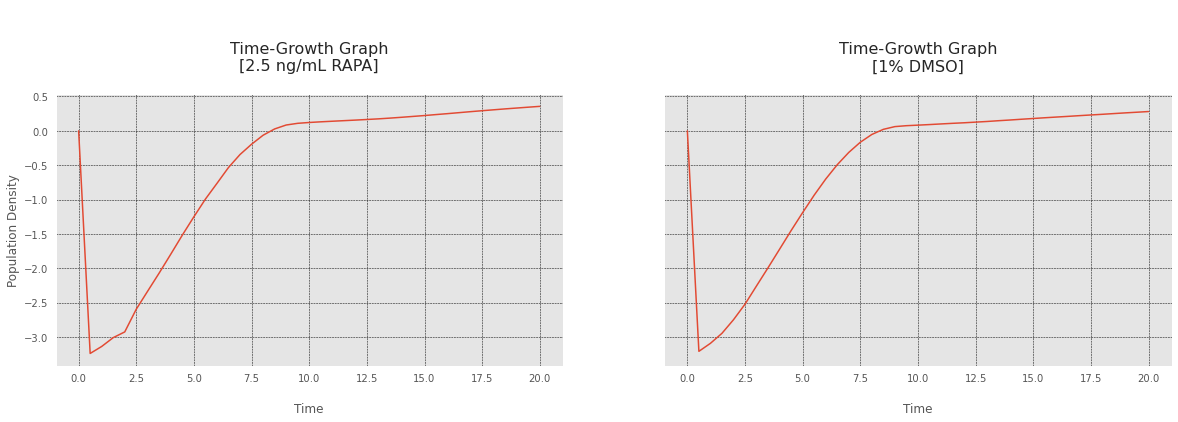

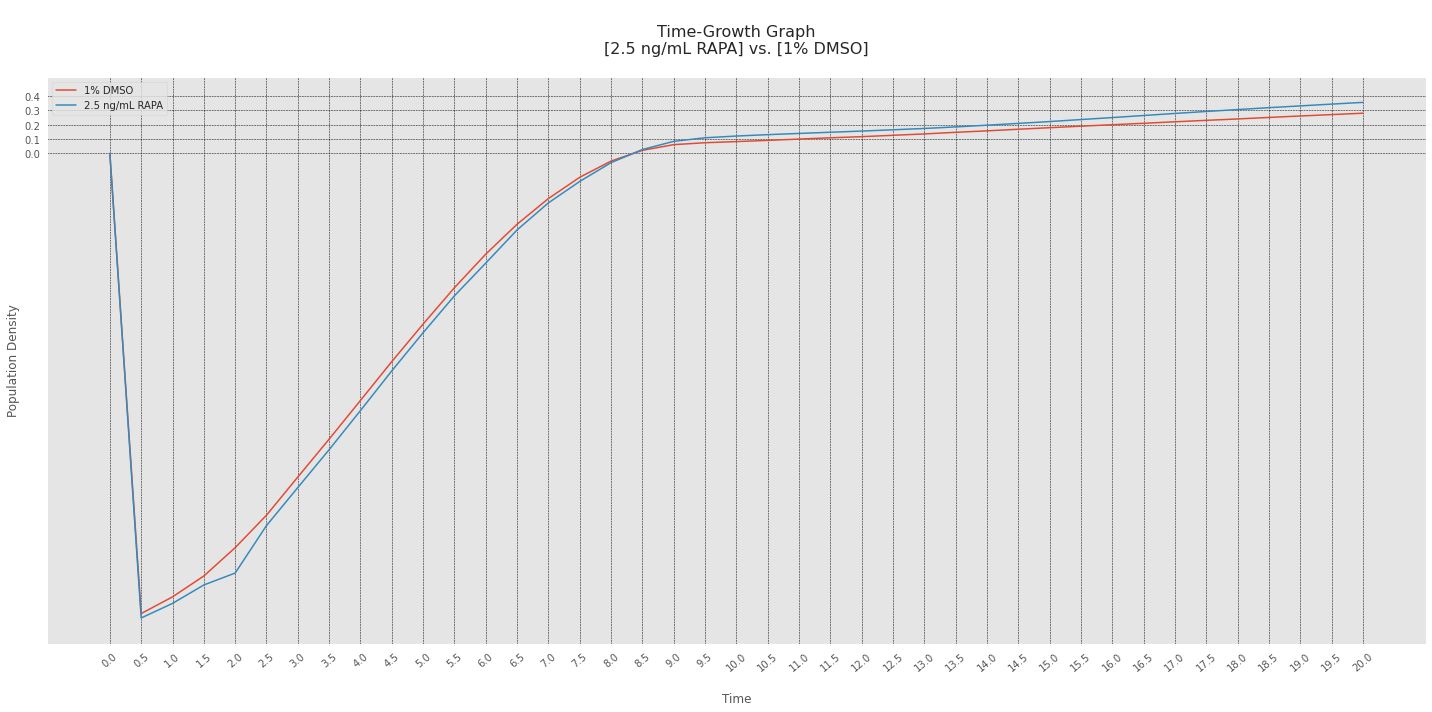

In [374]:
TimeGraph_treatment_vehicle(row=4, treatment=treatments[4], data=ln1, vehicle=treatments[2])

By taking OD values at **Time_6.5** and **Time_7** we can calculate for the rate of cell growth after the application of 2.5 ng/mL Rapamycin.
* `r = [ln(OD_7) - ln(OD_6.5)] / (7 - 6.5)` 
* `r = [-0.344840 - (-0.533393)] / (7 - 6.5)`
* `r = 0.188553 / 0.5`
* `r = 0.377106`

### Actual number of biological replicates for BY4743 Strain at Time_6

In [375]:
rate = 0.377106
bio_replicates = num_replicates(rate, rep_time=6)
bio_replicates

'Number of biological replicates at time 6 is 2.262636.'

#### Time-Graph for **`2.5 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

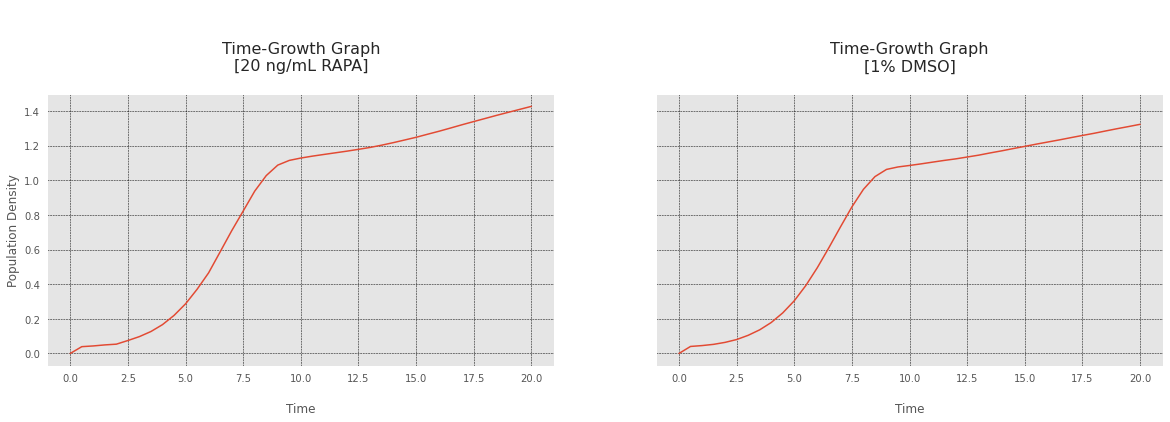

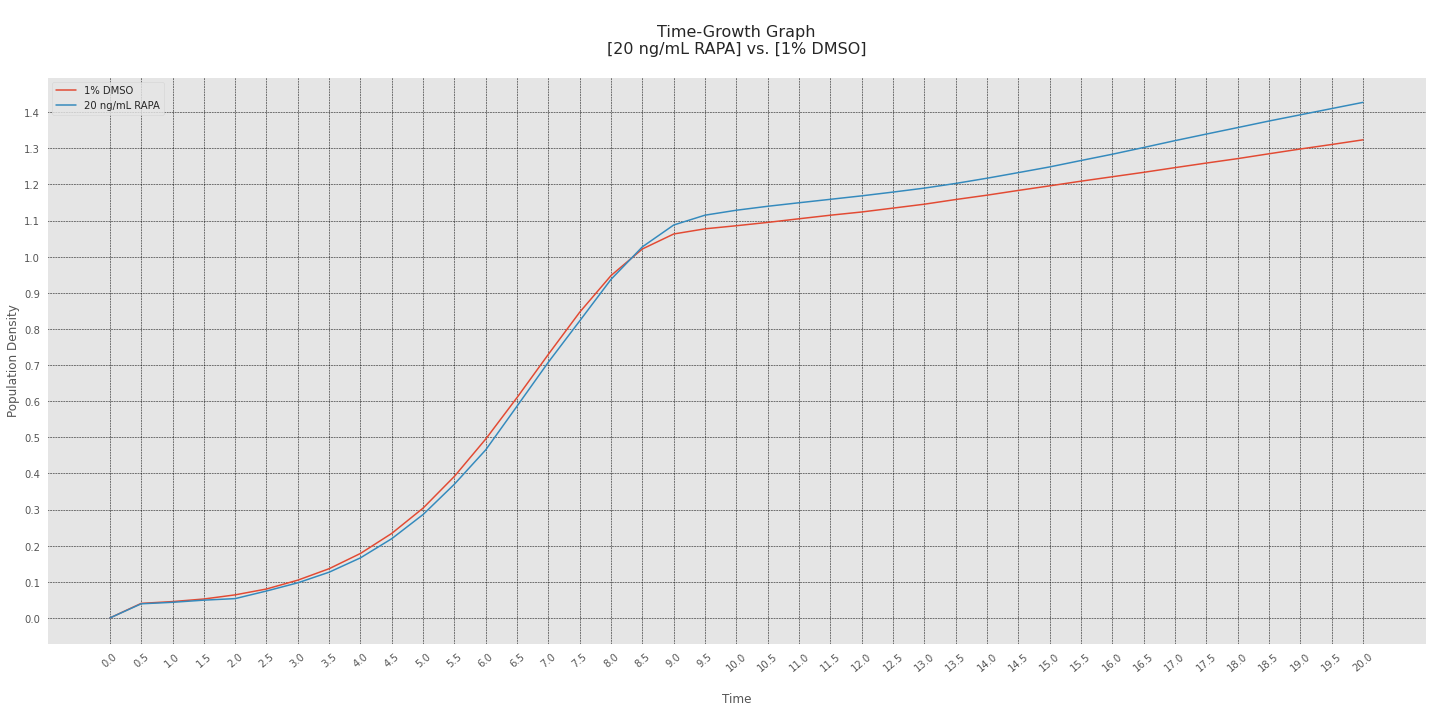

In [405]:
TimeGraph_treatment_vehicle(row=4, treatment=treatments[3])

In [377]:
RAPA1_DMSO1_percent, RAPA1_mult = percentage(4, avg_control)
print(black("Doubling time effect of 2.5 ng/mL Rapamycin", 'bold'), "\n\n-> "+ str(RAPA1_DMSO1_percent)+" % increase in DT_inf.", "\n-> The treatment has experienced a "+ str(RAPA1_mult)+" times growth in DT_inf")

Doubling time effect of 2.5 ng/mL Rapamycin 

-> -2.66 % increase in DT_inf. 
-> The treatment has experienced a 0.97 times growth in DT_inf


> ### Analysis
* The time-growth graphical representation shows that the treatment group with **2.5 ng/mL Rapamycin** has undergone the most rapid overall growth rate compared to the control group: **1% DMSO**.
* Further investigation of the percentage effect in doubling time inflection of **2.5 ng/mL Rapamycin** is as follows:
    * The percentage effect of the Rapamycin treatment shows an **2.66% decrease** in doubling time inflection. It has experienced a **0.97** times growth in doubling time inflection.

The value for doubling time inflection is the optical density measurement at the steepest slope in the growth-time curve. So, showing an **2.66%** decrease in doubling time inflection is an excellent indicator for the thriving growth-rate in the fermentative metabolism stage.

#### Time-Graph for **`20 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

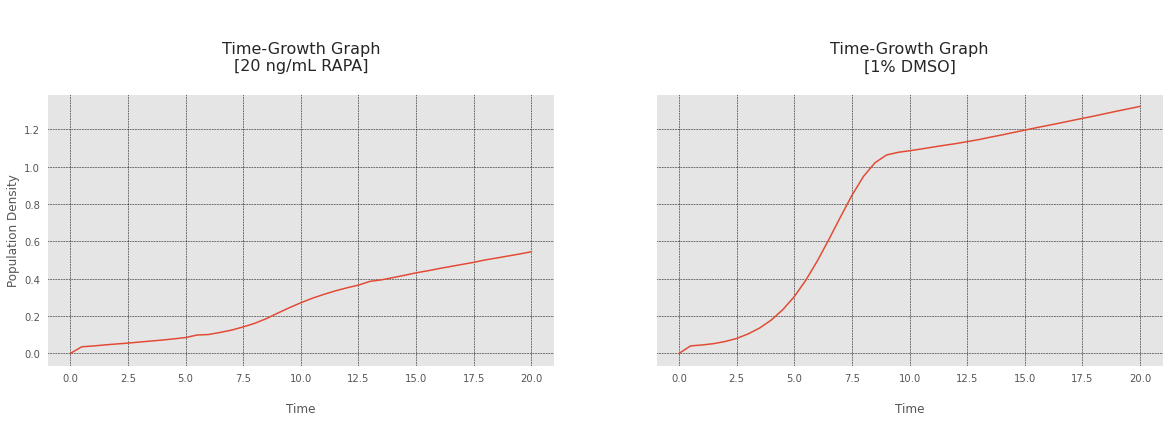

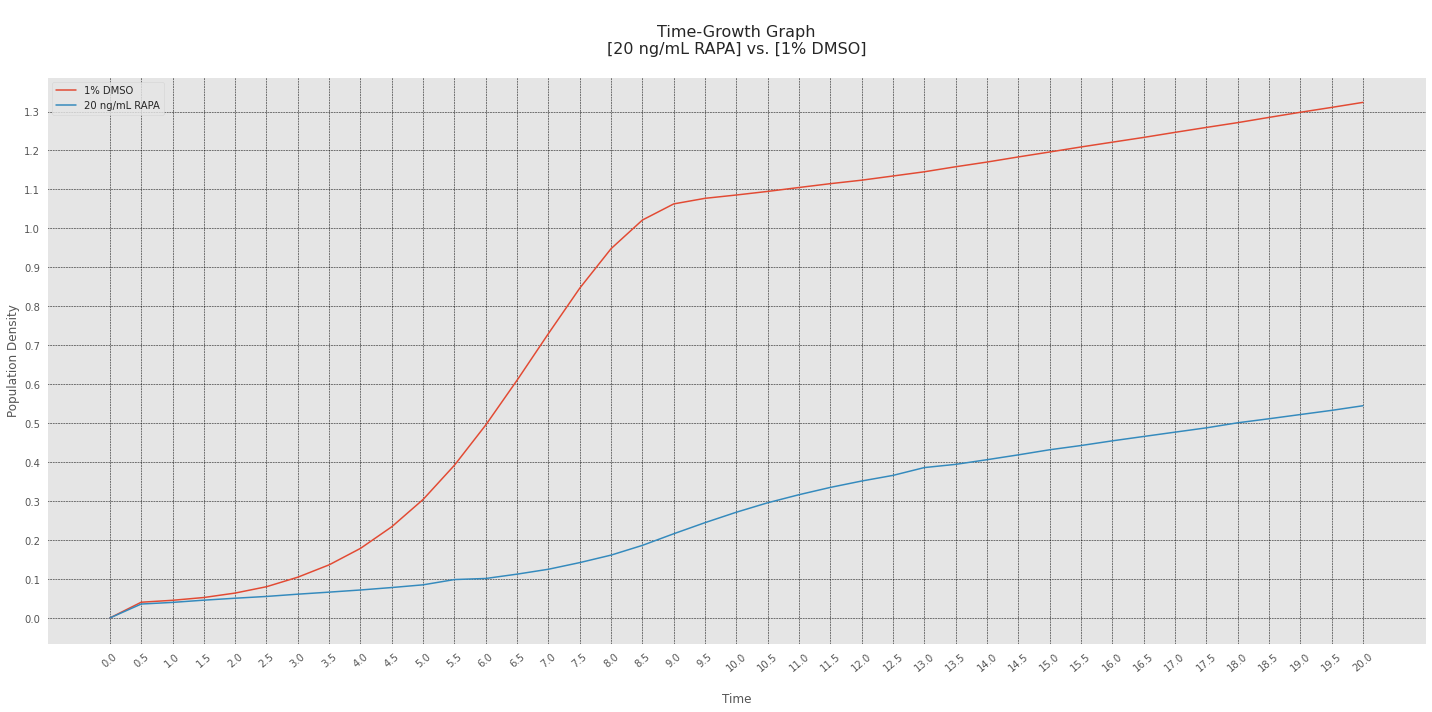

In [378]:
TimeGraph_treatment_vehicle(row=3, treatment=treatments[3])

In [379]:
RAPA2_DMSO1_percent, RAPA2_mult = percentage(3, avg_control)
print(black("Doubling time effect of 20 ng/mL Rapamycin", 'bold'), "\n\n-> "+ str(RAPA2_DMSO1_percent)+" % increase in DT_inf.", "\n-> The treatment has experienced a "+ str(RAPA2_mult)+" times growth in DT_inf")

Doubling time effect of 20 ng/mL Rapamycin 

-> 194.71 % increase in DT_inf. 
-> The treatment has experienced a 2.95 times growth in DT_inf


> ### Analysis
* The time-growth graphical representation shows that the treatment group with **20 ng/mL Rapamycin** has undergone the least overall growth rate compared to the control group: **1% DMSO**.
* Further investigation of the percentage effect in doubling time inflection of **20 ng/mL Rapamycin** is as follows:
    * The percentage effect of the Rapamycin treatment shows an **194.7% increase** in doubling time inflection. It has expereinced a **2.95** times growth in doubling time inflection.

In [380]:
avg_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,74.964907,2.562885,81.395119,4.154267,0.0,0.038381,0.043333,0.048500,0.056929,0.068310,0.086310,0.112643,0.146405,0.192500,0.239071,0.315024,0.387571,0.483929,0.583119,0.683238,0.781310,0.869071,0.941619,0.991000,1.019714,1.036690,1.047881,1.058786,1.072571,1.087595,1.103405,1.121429,1.138881,1.158214,1.176667,1.189738,1.203048,1.215048,1.227524,1.240571,1.253333,1.265476,1.278619,1.291952,1.303786
2.5% DMSO,77.491354,2.176891,82.826506,1.792261,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528
1% DMSO,72.730884,2.158362,76.765604,2.192335,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
20 ng/mL RAPA,214.342431,13.165233,447.826486,40.543438,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
2.5 ng/mL RAPA,70.797585,1.999423,148.523832,63.860668,0.0,0.039194,0.043389,0.049333,0.053611,0.074639,0.097333,0.126722,0.166472,0.219556,0.286472,0.370500,0.465528,0.586611,0.708333,0.822556,0.937556,1.027389,1.087833,1.115028,1.128667,1.139611,1.149361,1.158889,1.168472,1.178917,1.189861,1.202833,1.217278,1.232778,1.248556,1.266278,1.283667,1.302306,1.321278,1.339472,1.357417,1.375583,1.392750,1.410028,1.427194
6.67% H2O,74.711882,1.752628,79.077668,1.926197,0.0,0.050643,0.055095,0.065381,0.079476,0.099476,0.127762,0.165190,0.215452,0.280476,0.359143,0.455167,0.563810,0.679095,0.794548,0.899000,0.979214,1.029262,1.051643,1.063238,1.072619,1.080929,1.090333,1.100571,1.110119,1.121833,1.134119,1.146524,1.158905,1.172381,1.186190,1.199905,1.213881,1.227857,1.240595,1.256190,1.270690,1.284857,1.297595,1.312595,1.325381
25 uM Torin 1,99.108238,5.951806,108.846073,9.358162,0.0,0.034697,0.036697,0.038091,0.039212,0.040818,0.043606,0.046061,0.048636,0.052212,0.056303,0.066212,0.068455,0.076606,0.086515,0.098879,0.112970,0.128273,0.146848,0.166909,0.189515,0.213545,0.236667,0.262091,0.291333,0.327333,0.371909,0.411545,0.458000,0.509515,0.561485,0.609242,0.657000,0.709273,0.756545,0.808455,0.865455,0.922364,0.979515,1.032364,1.078091
100 uM GDC0941,80.136357,3.392595,84.269401,0.783792,0.0,0.047250,0.056708,0.063583,0.071875,0.086458,0.107083,0.135708,0.169083,0.216375,0.278417,0.354458,0.445708,0.552000,0.670958,0.784625,0.881458,0.970625,1.045250,1.100417,1.134583,1.148250,1.157375,1.167667,1.179000,1.192083,1.204792,1.216708,1.229625,1.243250,1.257375,1.270542,1.283833,1.295583,1.308000,1.319542,1.331458,1.343375,1.353708,1.363458,1.373792
1 mg/mL Caffeine,99.813142,3.543731,109.112716,3.654306,0.0,0.044026,0.046436,0.048667,0.051308,0.058359,0.065462,0.073897,0.088590,0.106231,0.127718,0.154103,0.187205,0.226077,0.274487,0.333564,0.401923,0.479667,0.566615,0.656821,0.743410,0.825615,0.902744,0.972641,1.026436,1.06525

#### Change in DMSO Concentration

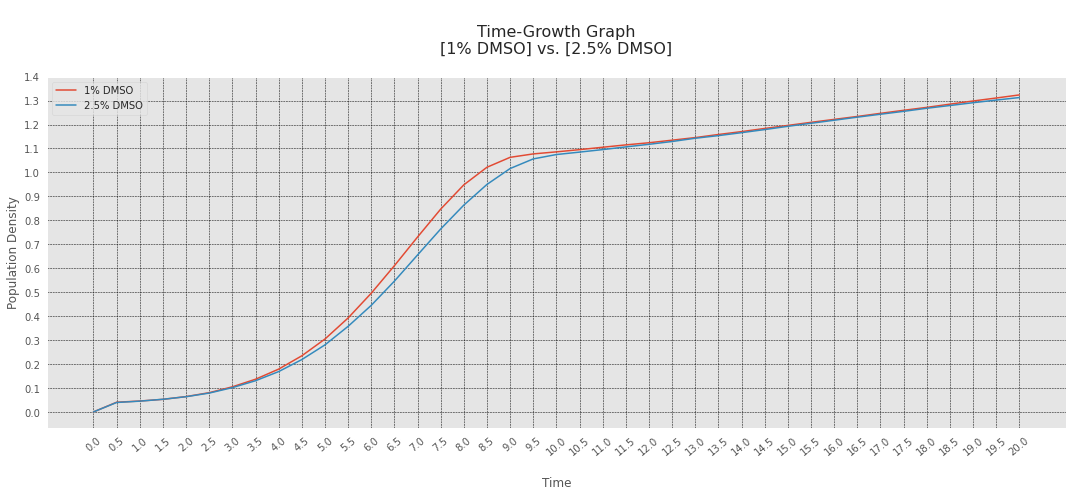

In [381]:
time_graph_DMSO(data=avg_control_time)

> #### **Observation**

The graphical representation of the time-growth curve shows that a treatment solution of **1% DMSO** exhibits a higher overall growth-rate than a treatment of **2.5% DMSO**. It should also be noted that the addition of more **DMSO** brings about an increase in the doubling time inflection.

#### Plotting For BY4743's Doubling Time Inflection Values For Each Treatment

In [382]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [383]:
avg_data = [Torin1_control, DMSO2_control, DMSO1_control, RAPA2_control, RAPA1_control, H2O_control, Torin2_control, GDC0941_control, Caffeine_control, AZD8055_control]

In [384]:
dt_val = [list(i["DT inflection"]) for i in avg_data]

In [406]:
def box_plot(data, title='BY4743'):
    
    fig, ax = plt.subplots(figsize=(20,20))

    flier = dict(markerfacecolor='red', marker='D')
    mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
    conf_intervals = [.95]*len(data)

    g = sns.boxplot(data=data, 
                    width=.7,
                    # notch='True',
                    flierprops=flier,
                    # conf_intervals=conf_intervals,
                    showmeans=True,
                    meanprops=mean_shape)

    xvalues = treatments
    plt.xticks(np.arange(10), xvalues, rotation=40)
    plt.yticks(np.arange(0,340,20))

    # Setting Title
    plt.title(title, fontsize=16)
    
    # X and Y axes labels
    plt.xlabel("Treatments", fontsize=14)
    plt.ylabel("Doubling Time\n(Minutes/cell division)", fontsize=14)

    # Set colors for the box plots
    palette = ['#FFA500', '#60d147', '#60d147', "#d35de3", "#d35de3", '#B7C3D0', '#FFA500', '#B7C3D0', '#B7C3D0', '#B7C3D0']
    color_dict = dict(zip(xvalues, palette))
    for i in range(0,10):
        mybox = g.patches[i]
        mybox.set_facecolor(color_dict[xvalues[i]])

    # Mini text showing mean, maximum and mininum values for the doubling time inflection
    locs = [-0.25, 0.76, 1.75, 2.68, 3.77, 4.75, 5.68, 6.8, 7.8, 8.8]

    for j in range(10):
        mean = round(np.mean(data[j]), 1)
        dt_inf_max = round(max(data[j]), 1)
        dt_inf_min = round(min(data[j]), 1)
        textstr = "$\overline {DT}$" + f" = {mean} \nmaxDT = {dt_inf_max} \nminDT = {dt_inf_min}"
        props = dict(boxstyle='round', facecolor=palette[j], alpha=.2)
        g.text(locs[j], 2.4, textstr, fontsize=12, bbox=props)

    # Remove spines
    sns.despine(top=True, right=True, left=True, bottom=False)
    
    plt.tight_layout()

    return plt.show()

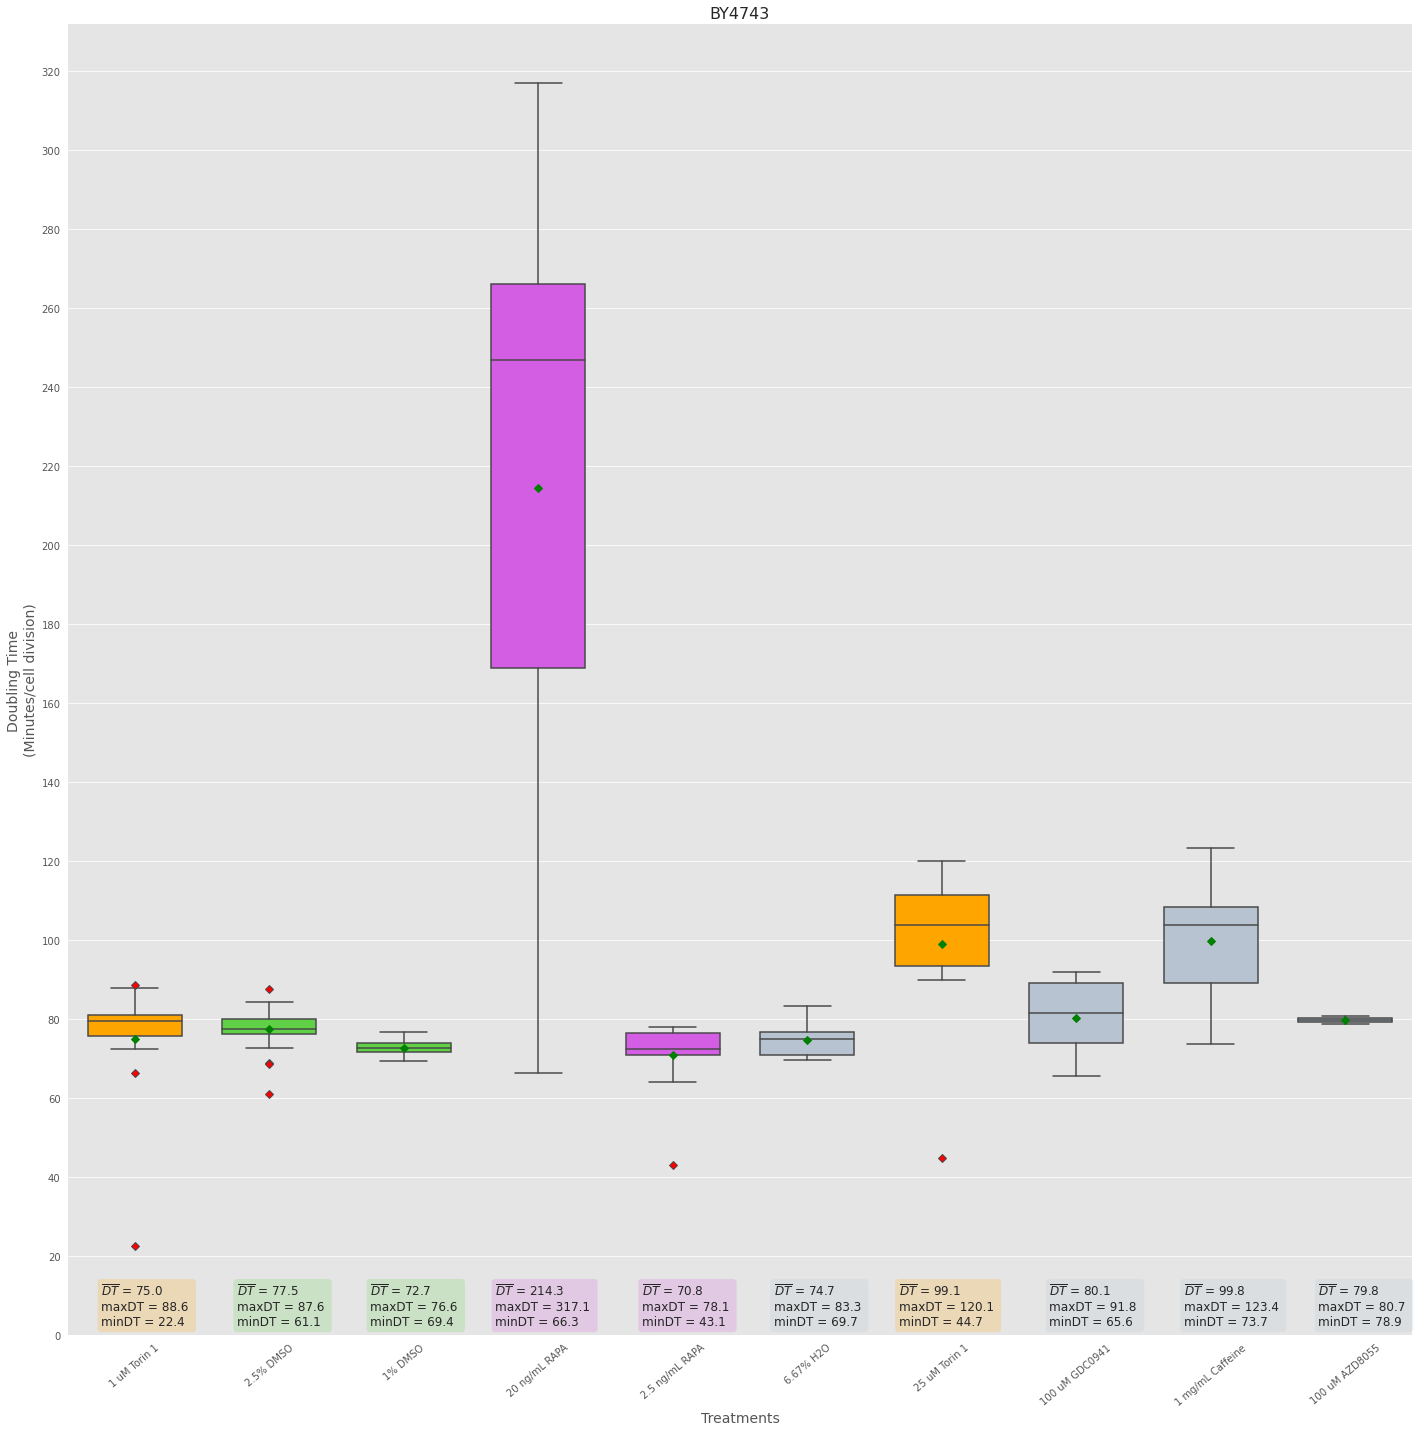

In [407]:
box_plot(dt_val)

In [387]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

### **Clustering for Similarities and Differences**

#### Strain Drug Sensitivity

In [388]:
t_treat = treatments[:1]+treatments[3:5]+treatments[6:]

In [389]:
dict_treat = {i : k for k, i in enumerate (treatments)}

In [390]:
significance_ratio = 2.0

In [391]:
st_avg_data(path=t_path, strain="BY4743", feature_drop=True)

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,74.964907,2.562885,81.395119,4.154267,0.0,0.038381,0.043333,0.048500,0.056929,0.068310,0.086310,0.112643,0.146405,0.192500,0.239071,0.315024,0.387571,0.483929,0.583119,0.683238,0.781310,0.869071,0.941619,0.991000,1.019714,1.036690,1.047881,1.058786,1.072571,1.087595,1.103405,1.121429,1.138881,1.158214,1.176667,1.189738,1.203048,1.215048,1.227524,1.240571,1.253333,1.265476,1.278619,1.291952,1.303786
2.5% DMSO,77.491354,2.176891,82.826506,1.792261,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528
1% DMSO,72.730884,2.158362,76.765604,2.192335,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
20 ng/mL RAPA,214.342431,13.165233,447.826486,40.543438,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
2.5 ng/mL RAPA,70.797585,1.999423,148.523832,63.860668,0.0,0.039194,0.043389,0.049333,0.053611,0.074639,0.097333,0.126722,0.166472,0.219556,0.286472,0.370500,0.465528,0.586611,0.708333,0.822556,0.937556,1.027389,1.087833,1.115028,1.128667,1.139611,1.149361,1.158889,1.168472,1.178917,1.189861,1.202833,1.217278,1.232778,1.248556,1.266278,1.283667,1.302306,1.321278,1.339472,1.357417,1.375583,1.392750,1.410028,1.427194
6.67% H2O,74.711882,1.752628,79.077668,1.926197,0.0,0.050643,0.055095,0.065381,0.079476,0.099476,0.127762,0.165190,0.215452,0.280476,0.359143,0.455167,0.563810,0.679095,0.794548,0.899000,0.979214,1.029262,1.051643,1.063238,1.072619,1.080929,1.090333,1.100571,1.110119,1.121833,1.134119,1.146524,1.158905,1.172381,1.186190,1.199905,1.213881,1.227857,1.240595,1.256190,1.270690,1.284857,1.297595,1.312595,1.325381
25 uM Torin 1,99.108238,5.951806,108.846073,9.358162,0.0,0.034697,0.036697,0.038091,0.039212,0.040818,0.043606,0.046061,0.048636,0.052212,0.056303,0.066212,0.068455,0.076606,0.086515,0.098879,0.112970,0.128273,0.146848,0.166909,0.189515,0.213545,0.236667,0.262091,0.291333,0.327333,0.371909,0.411545,0.458000,0.509515,0.561485,0.609242,0.657000,0.709273,0.756545,0.808455,0.865455,0.922364,0.979515,1.032364,1.078091
100 uM GDC0941,80.136357,3.392595,84.269401,0.783792,0.0,0.047250,0.056708,0.063583,0.071875,0.086458,0.107083,0.135708,0.169083,0.216375,0.278417,0.354458,0.445708,0.552000,0.670958,0.784625,0.881458,0.970625,1.045250,1.100417,1.134583,1.148250,1.157375,1.167667,1.179000,1.192083,1.204792,1.216708,1.229625,1.243250,1.257375,1.270542,1.283833,1.295583,1.308000,1.319542,1.331458,1.343375,1.353708,1.363458,1.373792
1 mg/mL Caffeine,99.813142,3.543731,109.112716,3.654306,0.0,0.044026,0.046436,0.048667,0.051308,0.058359,0.065462,0.073897,0.088590,0.106231,0.127718,0.154103,0.187205,0.226077,0.274487,0.333564,0.401923,0.479667,0.566615,0.656821,0.743410,0.825615,0.902744,0.972641,1.026436,1.06525

In [420]:
strains

['BY4743',
 'DBVPG 6765',
 'SK1',
 'Y55',
 'YPS128',
 'DBVPG 6044',
 'DBVPG 1788',
 'DBVPG 1373',
 'DBVPG 1853',
 'L-1528',
 'Y12',
 'DBVPG 1106',
 'K11',
 'YS4',
 'YS9',
 '322134 S ',
 '378604 X',
 '273614 N',
 'Y6.5',
 'Q62.5',
 'Q89.8',
 'KPN3828',
 'Y9.6',
 'Q74.4',
 'Q69.8',
 'W7',
 'Q31.4',
 'Y8.5',
 'Z1',
 'CBS432',
 'Y8.1',
 'KPN3829',
 'UFRJ50791',
 'IFO1804',
 'UWOPS91-917.1',
 'CLIB324',
 'PW5',
 'UWOPS83-787.3',
 'NCYC361',
 'W303',
 'Y10',
 'T21.4',
 'Q95.3',
 'A4',
 'YJM978',
 'Y9',
 'UWOPS03-461.4 ',
 'UWOPS05-217.3 ',
 'S288c ',
 'UWOPS05-227.2 ',
 'DBVPG 6040 ',
 'YIIc17_E5 ',
 'YJM981 ',
 'YJM975 ',
 'NCYC110 ',
 'YS2 ',
 'T7',
 'FL100',
 'UC5',
 'T73',
 'CLIB215',
 'YJM269',
 'CLIB382',
 'CBS7960',
 'FM479',
 'BC187',
 'YPS606',
 'L-1374',
 'UWOPS87-2421',
 'FM476',
 'FM356',
 'FM527',
 'FM677',
 'UFRJ50816',
 'N-17',
 'Q59.1',
 'YPS138',
 'S36.7',
 'Y7',
 'Q32.3',
 'Z1.1',
 'DBVPG 4650',
 'N-43',
 'CBS5829',
 'DBVPG 6304',
 'A12',
 'N-45',
 'N-44']

In [393]:
avg_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1 uM Torin 1,74.964907,2.562885,81.395119,4.154267,0.0,0.038381,0.043333,0.048500,0.056929,0.068310,0.086310,0.112643,0.146405,0.192500,0.239071,0.315024,0.387571,0.483929,0.583119,0.683238,0.781310,0.869071,0.941619,0.991000,1.019714,1.036690,1.047881,1.058786,1.072571,1.087595,1.103405,1.121429,1.138881,1.158214,1.176667,1.189738,1.203048,1.215048,1.227524,1.240571,1.253333,1.265476,1.278619,1.291952,1.303786
2.5% DMSO,77.491354,2.176891,82.826506,1.792261,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528
1% DMSO,72.730884,2.158362,76.765604,2.192335,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
20 ng/mL RAPA,214.342431,13.165233,447.826486,40.543438,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
2.5 ng/mL RAPA,70.797585,1.999423,148.523832,63.860668,0.0,0.039194,0.043389,0.049333,0.053611,0.074639,0.097333,0.126722,0.166472,0.219556,0.286472,0.370500,0.465528,0.586611,0.708333,0.822556,0.937556,1.027389,1.087833,1.115028,1.128667,1.139611,1.149361,1.158889,1.168472,1.178917,1.189861,1.202833,1.217278,1.232778,1.248556,1.266278,1.283667,1.302306,1.321278,1.339472,1.357417,1.375583,1.392750,1.410028,1.427194
6.67% H2O,74.711882,1.752628,79.077668,1.926197,0.0,0.050643,0.055095,0.065381,0.079476,0.099476,0.127762,0.165190,0.215452,0.280476,0.359143,0.455167,0.563810,0.679095,0.794548,0.899000,0.979214,1.029262,1.051643,1.063238,1.072619,1.080929,1.090333,1.100571,1.110119,1.121833,1.134119,1.146524,1.158905,1.172381,1.186190,1.199905,1.213881,1.227857,1.240595,1.256190,1.270690,1.284857,1.297595,1.312595,1.325381
25 uM Torin 1,99.108238,5.951806,108.846073,9.358162,0.0,0.034697,0.036697,0.038091,0.039212,0.040818,0.043606,0.046061,0.048636,0.052212,0.056303,0.066212,0.068455,0.076606,0.086515,0.098879,0.112970,0.128273,0.146848,0.166909,0.189515,0.213545,0.236667,0.262091,0.291333,0.327333,0.371909,0.411545,0.458000,0.509515,0.561485,0.609242,0.657000,0.709273,0.756545,0.808455,0.865455,0.922364,0.979515,1.032364,1.078091
100 uM GDC0941,80.136357,3.392595,84.269401,0.783792,0.0,0.047250,0.056708,0.063583,0.071875,0.086458,0.107083,0.135708,0.169083,0.216375,0.278417,0.354458,0.445708,0.552000,0.670958,0.784625,0.881458,0.970625,1.045250,1.100417,1.134583,1.148250,1.157375,1.167667,1.179000,1.192083,1.204792,1.216708,1.229625,1.243250,1.257375,1.270542,1.283833,1.295583,1.308000,1.319542,1.331458,1.343375,1.353708,1.363458,1.373792
1 mg/mL Caffeine,99.813142,3.543731,109.112716,3.654306,0.0,0.044026,0.046436,0.048667,0.051308,0.058359,0.065462,0.073897,0.088590,0.106231,0.127718,0.154103,0.187205,0.226077,0.274487,0.333564,0.401923,0.479667,0.566615,0.656821,0.743410,0.825615,0.902744,0.972641,1.026436,1.06525

In [472]:
def mult_thresh(treatment, strain="BY4743", threshold=significance_ratio):
    
    if treatment not in treatments:
        return "Invalid Treatment!"
    elif treatment == treatments[4] or treatment == treatments[3]:
        vehicle = treatments[2]
    elif treatment == treatments[9]:
        vehicle = treatments[5]
    else:
        vehicle = treatments[1]
    
    data = st_avg_data(path=t_path, strain=strain, feature_drop=True)
    dict_treat = {i : k for k, i in enumerate (treatments)}
    
    _, mult_val = percentage(index=dict_treat[treatment], df=data, vehicle=vehicle)
    if mult_val >= threshold:
        return strain
    else:
        return None

#### Plotting for high dosage of Torin and Rapamycin 

In [ ]:
def t_sensitivity(index, treatment, df=avg_control, vehicle=treatments[2]):
    LD_percentage, _ = percentage(index=0, df=df, vehicle=vehicle)
    HD_percentage, _ = percentage(index=1, df=df, vehicle=vehicle)
    # HD = 
    # LD = 
    # significance_ratio = 3.2
    

#### Plotting for high and low treatment impact among strains

In [546]:
def HL_VennDiagram(t1, t2, threshold=significance_ratio):
    
    t1_strains = [i for i in strains if mult_thresh(treatment=t1, strain=i, threshold=significance_ratio) in strains]
    t2_strains = [i for i in strains if mult_thresh(treatment=t2, strain=i, threshold=significance_ratio) in strains]
    
    t1_t2_strains = list(set(t1_strains) & set(t2_strains))
    t1_strains = list(set(t1_strains) - set(t2_strains))
    t2_strains = list(set(t2_strains) - set(t1_strains))
    
    subset_1, subset_2, subset_12 = '', '', ''
    for i, j, k in zip_longest(t1_strains, t2_strains, t1_t2_strains):
        if i is not None:
            subset_1 += ''.join(i+'\n\n')
        if j is not None:
            subset_2 += ''.join(j+'\n\n')
        if k is not None:
            subset_12 += ''.join(k+'\n\n')
    
    subsets = [subset_1, subset_2, subset_12]
    set_labels=[t1, t2]
    
    fig, ax = plt.subplots(figsize=(50,50))
    venn2(subsets=subsets, ax=ax, set_labels=tuple(set_labels), alpha=.76)
    ax.set_title("Treatments Impact on Strains", fontsize=24)
    
    return plt.show()

#### Treatment-Strain Impact for High and Low Rapamycin

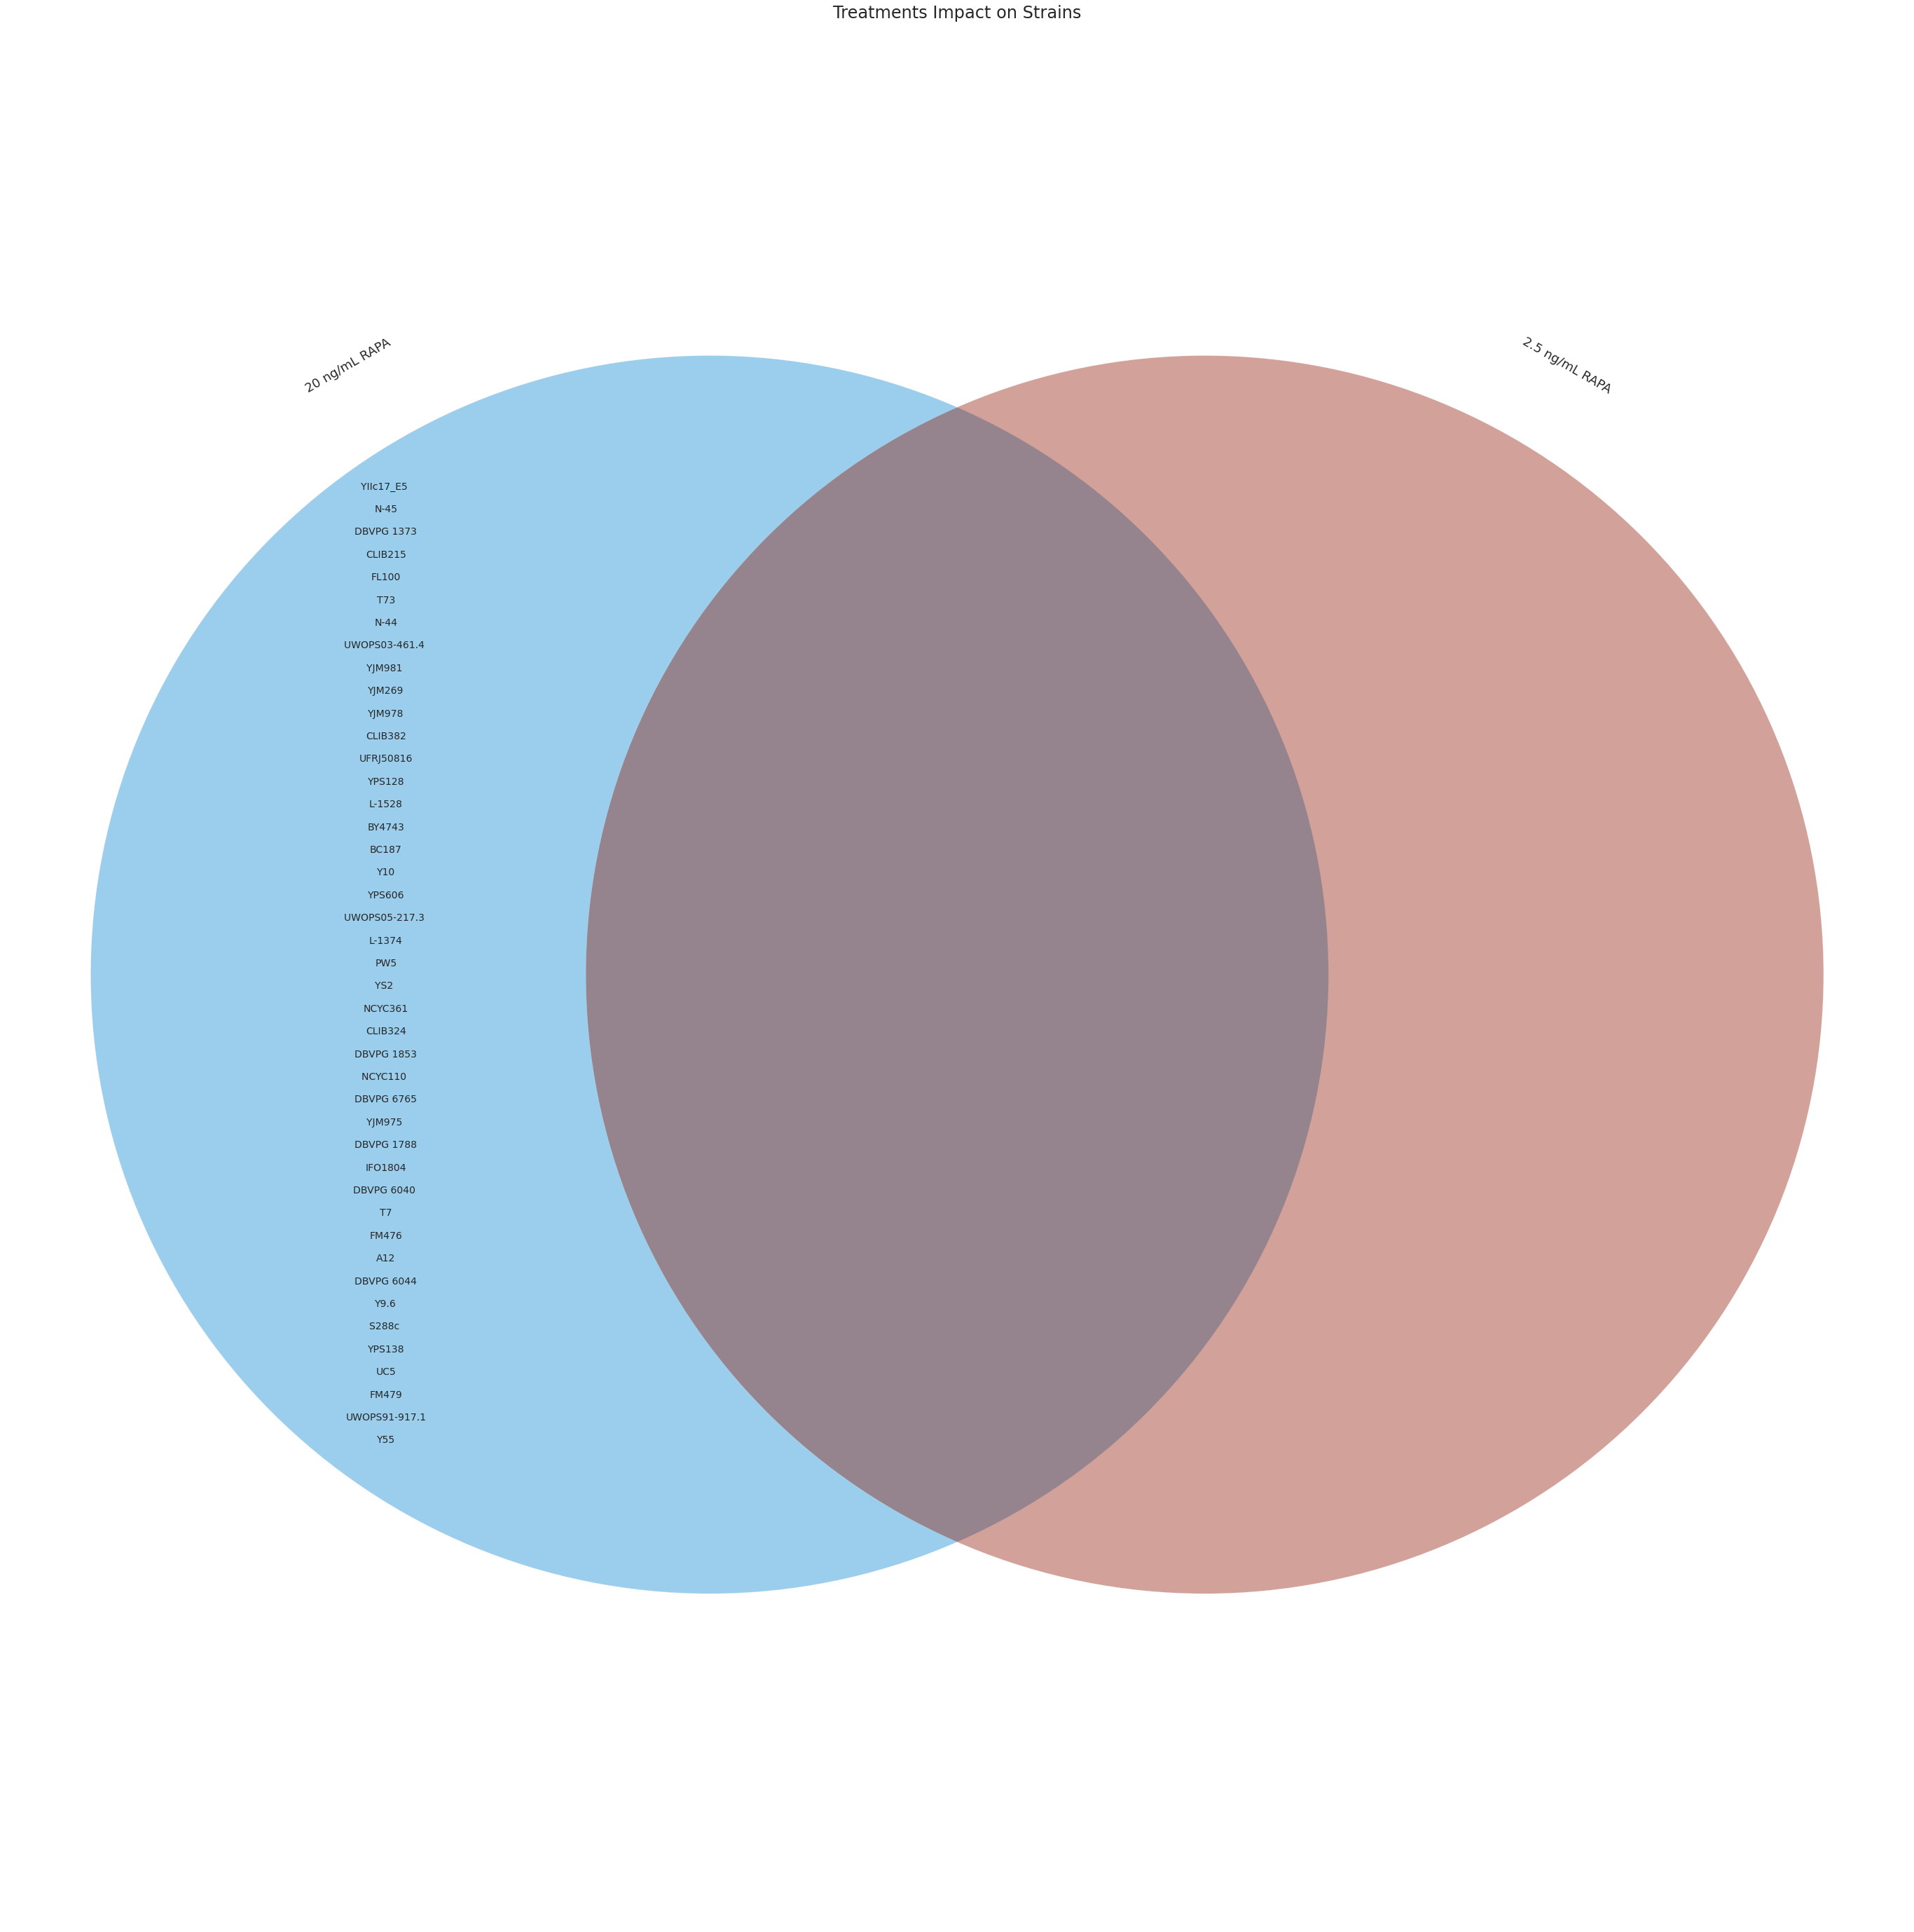

In [547]:
HL_VennDiagram(t1=treatments[3], t2=treatments[4], threshold=significance_ratio)